# 1083 Albumin Analysis with Updated Dataset

### By: Ian Weimer

## ML Caveats

### If the feature space is not correlated enough with the target variable, then generally  no model can have any meaningful predictive power.

### Individual variables do not necessarily need to have high correlations with the target variable (although this is generally a good thing), but altogether, the variables need to be correlated/predictive enough of the target variable. 

## Imports

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
import scipy.stats
pd.set_option('display.max_columns', None)

## Preprocessing and Exploratory Data Analysis 

## Load Albumin Data

In [2]:
pwd

'/Users/ianweimer/1083-albumin-data-exploration/ML'

In [3]:
df_alb = pd.read_csv('/Users/ianweimer/1083-albumin-data-exploration/ML/tables/gi_bleed_anemia_all-4.csv', index_col=0)

In [4]:
df_alb.head()

personid                           encounterid  \
0  001c4742-8e99-4929-9b1c-0b8c6f3e230a  4f8fae0f-a286-4120-b78c-c60086d95f88   
1  019634ce-13e2-4f8c-9f7f-ba5fba461d1f  9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a   
2  01d02e7a-3cd1-47dd-9d5f-188e591a04df  eef69bb8-c0a3-425d-b016-7df3a2903ed5   
3  05b4f125-f42f-4ade-ad65-f6d591c51790  2ae26cea-7902-40ea-9f24-d65f49d03724   
4  077a4e0b-b3ba-4025-a8b6-46a51d5183c6  2227d951-5657-47a0-aa62-4dcd86d6d04d   

            index_date   age sex   race  zip_code bed_size  ICU  \
0  2019-05-31 13:58:00  45.0   M  Black         1   >=1000    1   
1  2019-03-07 20:26:00  54.0   F  White         7  500-999    1   
2  2019-07-17 23:07:00  79.0   M  White         9   >=1000    0   
3  2020-06-21 14:45:00  75.0   M  Other         1   >=1000    0   
4  2017-01-12 17:18:00  74.0   F  Black         1   >=1000    0   

   total_ICU_LOS_hours    LOS_hours  mass_transfusion  total_transfusions  \
0          7956.633333  1016.016667                 0                   1   
1          4045.563333   531.133333                 1                   0   
2                  NaN    26.383333                 0                   1   
3                  NaN    50.916667                 0                   1   
4                  NaN  1500.383333                 0                   0   

  anemia_status  CCI  30_day_mortality  30_day_readmission  \
0      moderate    6                 0                   0   
1          none    4                 0                   1   
2        severe    6                 0                   1   
3          none    2                 1                   0   
4          none    6                 0                   0   

   days_until_readmission  bl_albumin_value  last_albumin_value  \
0              758.111111               2.9                 3.2   
1               18.750000               3.1                 2.7   
2                2.806250               NaN                 NaN   
3                     NaN               NaN                 NaN   
4                     NaN               2.0                 2.4   

   albumin_lab_baseline_severity  normal_albumin_achieved  hemoglobin  \
0                            1.0                      1.0         8.4   
1                            0.0                      NaN        11.2   
2                            NaN                      NaN         4.8   
3                            NaN                      NaN        15.6   
4                            1.0                      0.0        14.7   

   time_to_albumin  albumin_timing  5_percent_albumin  25_percent_albumin  \
0       166.966667               0                  0                   0   
1       225.116667               0                  0                   1   
2         3.018056               1                  0                   1   
3        28.250000               0                  1                   1   
4       189.700000               0                  0                   0   

   unknown_albumin_type  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  \
0                     1  11.0      1          0             1            0   
1                     0   NaN      0          1             0            0   
2                     1   NaN      0          0             1            0   
3                     1   NaN      1          0             0            0   
4                     1  15.0      1          0             1            0   

   SAPS  tenant  
0    34      45  
1    18      36  
2    29       7  
3    67      45  
4    28      46

In [5]:
df_alb.shape

(22192, 35)

In [6]:
print('Number of unique patients:', df_alb.personid.nunique())
print('Number of unique encounters:', df_alb.encounterid.nunique())

Number of unique patients: 20734
Number of unique encounters: 22192


In [7]:
df_alb.isnull().sum()

personid                             0
encounterid                          0
index_date                           0
age                                  2
sex                                 44
race                              1083
zip_code                             0
bed_size                             0
ICU                                  0
total_ICU_LOS_hours              15107
LOS_hours                            1
mass_transfusion                     0
total_transfusions                   0
anemia_status                        0
CCI                                  0
30_day_mortality                     0
30_day_readmission                   0
days_until_readmission            9400
bl_albumin_value                  8627
last_albumin_value                8627
albumin_lab_baseline_severity     8627
normal_albumin_achieved          13462
hemoglobin                         968
time_to_albumin                     93
albumin_timing                       0
5_percent_albumin        

## Load Non Albumin Data

In [8]:
df_no_alb = pd.read_csv('/Users/ianweimer/1083-albumin-data-exploration/ML/tables/no_albumin_gi_bleed_anemia_all-3.csv', index_col=0)

In [9]:
df_no_alb.head()

personid                           encounterid  \
0  0034c8e8-d981-401f-99c3-49c522415c3f  cf7ca286-ddc2-4e64-ae66-d660698de715   
1  0094a748-b23f-4704-8df0-6f6c112c022d  3d654b3b-e615-4805-8d23-4c5498246111   
2  009e66f6-5527-48bc-af91-f624389ebc0f  fc8a5d62-a07b-4e7c-9686-dfb55e07d6c2   
3  00a04a10-5e1e-4aed-9649-8d2b1771a3c5  ae85bfb3-a977-4dfe-96cf-4c63d10af095   
4  00b9ab91-733a-48c7-b0d7-0738c02b3a1a  2d33ea02-bf05-4f51-b815-13f8e39edef1   

            index_date   age sex   race  zip_code bed_size  ICU  \
0  2018-12-11 02:47:00  76.0   M  White         8   >=1000    0   
1  2018-12-22 18:14:00  80.0   F  White         1   >=1000    0   
2  2017-05-20 15:01:00  62.0   M  White         9   >=1000    0   
3  2018-11-29 21:57:00  86.0   M  White         0  500-999    0   
4  2020-02-08 21:45:16  75.0   F  White         3  500-999    0   

   total_ICU_LOS_hours   LOS_hours  mass_transfusion  total_transfusions  \
0                  NaN  208.016667                 0                   0   
1                  NaN  245.266667                 0                   1   
2                  NaN   51.650000                 0                   0   
3                  NaN  191.700000                 0                   1   
4                  NaN  121.412222                 0                   1   

  anemia_status  CCI  30_day_mortality  30_day_readmission  \
0      moderate    2                 0                   0   
1        severe    2                 0                   0   
2          none    3                 0                   0   
3      moderate    2                 0                   1   
4      moderate    5                 0                   0   

   days_until_readmission  bl_albumin_value  last_albumin_value  \
0              321.625000               3.3                 2.9   
1               33.510417               NaN                 NaN   
2              559.286806               4.0                 3.4   
3               10.081944               3.3                 3.1   
4              122.702975               NaN                 NaN   

   albumin_lab_baseline_severity  normal_albumin_achieved  hemoglobin  MELD  \
0                            0.0                      NaN         7.4  13.0   
1                            NaN                      NaN         4.3  11.0   
2                            0.0                      NaN        11.7   6.0   
3                            0.0                      NaN         8.0   7.0   
4                            NaN                      NaN         8.5   NaN   

   qSOFA  Cirrhosis  beta_blocker  hemorrhagic  SAPS  tenant  
0      1          1             0            0    22      63  
1      0          0             0            0    32      45  
2      0          1             0            0    33      68  
3      2          0             0            0    39      51  
4      0          0             0            0    16     113

In [10]:
df_no_alb.shape

(134739, 30)

In [11]:
print('Number of unique patients:', df_no_alb.personid.nunique())
print('Number of unique encounters:', df_no_alb.encounterid.nunique())

Number of unique patients: 106515
Number of unique encounters: 134739


In [12]:
df_no_alb.isnull().sum()

personid                              0
encounterid                           0
index_date                            0
age                                   1
sex                                 319
race                               5886
zip_code                              0
bed_size                             61
ICU                                   0
total_ICU_LOS_hours              114288
LOS_hours                            20
mass_transfusion                      0
total_transfusions                    0
anemia_status                         0
CCI                                   0
30_day_mortality                      0
30_day_readmission                    0
days_until_readmission            39273
bl_albumin_value                  84489
last_albumin_value                84489
albumin_lab_baseline_severity     84489
normal_albumin_achieved          114420
hemoglobin                        19241
MELD                              75143
qSOFA                                 0


## Examine Difference In Vars

In [13]:
lst1 = df_alb.columns.tolist()
lst1

['personid',
 'encounterid',
 'index_date',
 'age',
 'sex',
 'race',
 'zip_code',
 'bed_size',
 'ICU',
 'total_ICU_LOS_hours',
 'LOS_hours',
 'mass_transfusion',
 'total_transfusions',
 'anemia_status',
 'CCI',
 '30_day_mortality',
 '30_day_readmission',
 'days_until_readmission',
 'bl_albumin_value',
 'last_albumin_value',
 'albumin_lab_baseline_severity',
 'normal_albumin_achieved',
 'hemoglobin',
 'time_to_albumin',
 'albumin_timing',
 '5_percent_albumin',
 '25_percent_albumin',
 'unknown_albumin_type',
 'MELD',
 'qSOFA',
 'Cirrhosis',
 'beta_blocker',
 'hemorrhagic',
 'SAPS',
 'tenant']

In [14]:
lst2 = df_no_alb.columns.tolist()
lst2

['personid',
 'encounterid',
 'index_date',
 'age',
 'sex',
 'race',
 'zip_code',
 'bed_size',
 'ICU',
 'total_ICU_LOS_hours',
 'LOS_hours',
 'mass_transfusion',
 'total_transfusions',
 'anemia_status',
 'CCI',
 '30_day_mortality',
 '30_day_readmission',
 'days_until_readmission',
 'bl_albumin_value',
 'last_albumin_value',
 'albumin_lab_baseline_severity',
 'normal_albumin_achieved',
 'hemoglobin',
 'MELD',
 'qSOFA',
 'Cirrhosis',
 'beta_blocker',
 'hemorrhagic',
 'SAPS',
 'tenant']

In [15]:
lst3 = [x for x in lst1 if x not in lst2]

In [16]:
lst3

['time_to_albumin',
 'albumin_timing',
 '5_percent_albumin',
 '25_percent_albumin',
 'unknown_albumin_type']

In [17]:
df_alb[['time_to_albumin', 'albumin_timing', '5_percent_albumin', \
       '25_percent_albumin', 'unknown_albumin_type']].head(10)

time_to_albumin  albumin_timing  5_percent_albumin  25_percent_albumin  \
0       166.966667               0                  0                   0   
1       225.116667               0                  0                   1   
2         3.018056               1                  0                   1   
3        28.250000               0                  1                   1   
4       189.700000               0                  0                   0   
5       550.833333               0                  1                   0   
6        17.600000               1                  0                   0   
7         2.250000               1                  0                   0   
8        73.900000               0                  0                   1   
9        38.790556               0                  0                   1   

   unknown_albumin_type  
0                     1  
1                     0  
2                     1  
3                     1  
4                     1  
5                     0  
6                     1  
7                     1  
8                     0  
9                     0

## Remove variables not relevant to analysis 

In [18]:
# Removing these variables: 
# Unnamed: 0 (index), index_date
# Keeping personid, encounterid for now
# But will drop these later as well

df_alb.drop(columns = ['index_date'], inplace=True)

df_no_alb.drop(columns = ['index_date'], inplace=True)

## Create binary "Albumin" variable for both datasets

In [19]:
# albumin dataset = all 1s 
df_alb = df_alb.assign(albumin = 1)

In [20]:
# no albumin dataset = all 0s
df_no_alb = df_no_alb.assign(albumin = 0)

In [21]:
df_alb.shape

(22192, 35)

In [22]:
df_no_alb.shape

(134739, 30)

In [23]:
df_alb.head()

personid                           encounterid  \
0  001c4742-8e99-4929-9b1c-0b8c6f3e230a  4f8fae0f-a286-4120-b78c-c60086d95f88   
1  019634ce-13e2-4f8c-9f7f-ba5fba461d1f  9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a   
2  01d02e7a-3cd1-47dd-9d5f-188e591a04df  eef69bb8-c0a3-425d-b016-7df3a2903ed5   
3  05b4f125-f42f-4ade-ad65-f6d591c51790  2ae26cea-7902-40ea-9f24-d65f49d03724   
4  077a4e0b-b3ba-4025-a8b6-46a51d5183c6  2227d951-5657-47a0-aa62-4dcd86d6d04d   

    age sex   race  zip_code bed_size  ICU  total_ICU_LOS_hours    LOS_hours  \
0  45.0   M  Black         1   >=1000    1          7956.633333  1016.016667   
1  54.0   F  White         7  500-999    1          4045.563333   531.133333   
2  79.0   M  White         9   >=1000    0                  NaN    26.383333   
3  75.0   M  Other         1   >=1000    0                  NaN    50.916667   
4  74.0   F  Black         1   >=1000    0                  NaN  1500.383333   

   mass_transfusion  total_transfusions anemia_status  CCI  30_day_mortality  \
0                 0                   1      moderate    6                 0   
1                 1                   0          none    4                 0   
2                 0                   1        severe    6                 0   
3                 0                   1          none    2                 1   
4                 0                   0          none    6                 0   

   30_day_readmission  days_until_readmission  bl_albumin_value  \
0                   0              758.111111               2.9   
1                   1               18.750000               3.1   
2                   1                2.806250               NaN   
3                   0                     NaN               NaN   
4                   0                     NaN               2.0   

   last_albumin_value  albumin_lab_baseline_severity  normal_albumin_achieved  \
0                 3.2                            1.0                      1.0   
1                 2.7                            0.0                      NaN   
2                 NaN                            NaN                      NaN   
3                 NaN                            NaN                      NaN   
4                 2.4                            1.0                      0.0   

   hemoglobin  time_to_albumin  albumin_timing  5_percent_albumin  \
0         8.4       166.966667               0                  0   
1        11.2       225.116667               0                  0   
2         4.8         3.018056               1                  0   
3        15.6        28.250000               0                  1   
4        14.7       189.700000               0                  0   

   25_percent_albumin  unknown_albumin_type  MELD  qSOFA  Cirrhosis  \
0                   0                     1  11.0      1          0   
1                   1                     0   NaN      0          1   
2                   1                     1   NaN      0          0   
3                   1                     1   NaN      1          0   
4                   0                     1  15.0      1          0   

   beta_blocker  hemorrhagic  SAPS  tenant  albumin  
0             1            0    34      45        1  
1             0            0    18      36        1  
2             1            0    29       7        1  
3             0            0    67      45        1  
4             1            0    28      46        1

In [24]:
df_no_alb.head()

personid                           encounterid  \
0  0034c8e8-d981-401f-99c3-49c522415c3f  cf7ca286-ddc2-4e64-ae66-d660698de715   
1  0094a748-b23f-4704-8df0-6f6c112c022d  3d654b3b-e615-4805-8d23-4c5498246111   
2  009e66f6-5527-48bc-af91-f624389ebc0f  fc8a5d62-a07b-4e7c-9686-dfb55e07d6c2   
3  00a04a10-5e1e-4aed-9649-8d2b1771a3c5  ae85bfb3-a977-4dfe-96cf-4c63d10af095   
4  00b9ab91-733a-48c7-b0d7-0738c02b3a1a  2d33ea02-bf05-4f51-b815-13f8e39edef1   

    age sex   race  zip_code bed_size  ICU  total_ICU_LOS_hours   LOS_hours  \
0  76.0   M  White         8   >=1000    0                  NaN  208.016667   
1  80.0   F  White         1   >=1000    0                  NaN  245.266667   
2  62.0   M  White         9   >=1000    0                  NaN   51.650000   
3  86.0   M  White         0  500-999    0                  NaN  191.700000   
4  75.0   F  White         3  500-999    0                  NaN  121.412222   

   mass_transfusion  total_transfusions anemia_status  CCI  30_day_mortality  \
0                 0                   0      moderate    2                 0   
1                 0                   1        severe    2                 0   
2                 0                   0          none    3                 0   
3                 0                   1      moderate    2                 0   
4                 0                   1      moderate    5                 0   

   30_day_readmission  days_until_readmission  bl_albumin_value  \
0                   0              321.625000               3.3   
1                   0               33.510417               NaN   
2                   0              559.286806               4.0   
3                   1               10.081944               3.3   
4                   0              122.702975               NaN   

   last_albumin_value  albumin_lab_baseline_severity  normal_albumin_achieved  \
0                 2.9                            0.0                      NaN   
1                 NaN                            NaN                      NaN   
2                 3.4                            0.0                      NaN   
3                 3.1                            0.0                      NaN   
4                 NaN                            NaN                      NaN   

   hemoglobin  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  SAPS  \
0         7.4  13.0      1          1             0            0    22   
1         4.3  11.0      0          0             0            0    32   
2        11.7   6.0      0          1             0            0    33   
3         8.0   7.0      2          0             0            0    39   
4         8.5   NaN      0          0             0            0    16   

   tenant  albumin  
0      63        0  
1      45        0  
2      68        0  
3      51        0  
4     113        0

## Combine Datasets

In [25]:
df = pd.concat([df_alb, df_no_alb], axis=0)

In [26]:
df.shape

(156931, 35)

In [27]:
df.head(50)

personid  \
0   001c4742-8e99-4929-9b1c-0b8c6f3e230a   
1   019634ce-13e2-4f8c-9f7f-ba5fba461d1f   
2   01d02e7a-3cd1-47dd-9d5f-188e591a04df   
3   05b4f125-f42f-4ade-ad65-f6d591c51790   
4   077a4e0b-b3ba-4025-a8b6-46a51d5183c6   
5   088a0350-8d51-43dd-9472-b208278372ae   
6   0a3154dd-d980-434a-af99-6f25cad83298   
7   0bffecfb-6f3f-4fba-a73f-684dfb888b33   
8   10b58aae-9abd-40f6-b1ed-fb394b5a8e57   
9   138a5556-63ee-4e60-b826-e1dc72628a0a   
10  19ae9a31-6f48-41e9-8902-65e6b2d3d001   
11  1b32ad01-1ee5-4c32-939b-eb6e6e5e3a48   
12  1d7f46c0-6f92-403b-b24c-cb4b653dca99   
13  1df390c3-18b8-41b0-acd9-23495059e97a   
14  1f7e4dd3-9985-4039-8099-ecea6ec7b94d   
15  1fd1313b-acbb-4744-828f-6a6809dbf561   
16  23221ca2-943d-40b1-8566-dc3e9d515775   
17  247c6aba-af0a-47fb-989a-f529ab420605   
18  2634b554-7b04-4abf-969d-2ffcde666661   
19  28ed58a7-f0a6-4383-8fa4-2e902b48ffc4   
20  2a2b87b9-905b-4ab7-8ba2-d63e7a3618ca   
21  2ab3ed5c-6e1d-41b0-b298-87aa387ceb13   
22  2b0bd82b-e305-4991-baf2-49a302ab1d2e   
23  2b4b67be-894a-415d-b241-6f64f5220bfb   
24  2d4989b3-7bd5-43a9-bf7f-f23e1b9bcb22   
25  2e2a8de8-2c5c-4a16-9fec-24e32d68ee56   
26  304a6435-d093-46ba-9eeb-28c65cfadf65   
27  3156e8fc-240f-40c8-8db2-c2446b652659   
28  359efbf5-44c0-4454-b18a-85a8e961d0d2   
29  36bac901-4c48-46d1-80dd-96cd8705fccd   
30  370a3e99-33e6-404a-8db4-187b1ba0a648   
31  37538836-dd53-4916-8614-d2d5067d17bd   
32  385016ac-0885-4fd8-8761-c65af40f66da   
33  394ffd20-e1e7-44c2-b991-93f115e71da0   
34  39d47ec2-2f69-4ab7-a93a-c59319331259   
35  3cc07cf0-d9b1-486a-a33f-7a0db69304dd   
36  3dd84581-4d59-43f2-ad28-8533144312cc   
37  3e61e48c-91d7-466b-8dff-89c791002dc6   
38  43c7671f-8311-40d6-861f-91e668874c01   
39  4977e0ee-27ef-4f1f-9833-3e26ddbc39b3   
40  4a8d6b06-391b-4c3d-8f9c-3dfd1f2cbffa   
41  4bf4a15e-626c-429c-9e90-86f7d31bc966   
42  4daa05d1-bbf7-462f-8623-fed7204b3135   
43  4ead1736-858d-4cdb-9adc-76a6660ca497   
44  4f141045-4c7d-4084-ae1d-99a994aebec8   
45  511e7212-cb6a-4a04-9d88-7f9fc66014d8   
46  51ae902d-1230-4cd4-b1b0-f8d5161d9f27   
47  51dabe14-cc4a-452c-9b2c-8d8d63b921c8   
48  52fa1f23-6e2e-4e9d-8c3e-9fe2265e946f   
49  53cd5eeb-a66b-4683-8950-845856616db6   

                             encounterid   age sex   race  zip_code bed_size  \
0   4f8fae0f-a286-4120-b78c-c60086d95f88  45.0   M  Black         1   >=1000   
1   9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a  54.0   F  White         7  500-999   
2   eef69bb8-c0a3-425d-b016-7df3a2903ed5  79.0   M  White         9   >=1000   
3   2ae26cea-7902-40ea-9f24-d65f49d03724  75.0   M  Other         1   >=1000   
4   2227d951-5657-47a0-aa62-4dcd86d6d04d  74.0   F  Black         1   >=1000   
5   3d2b1e18-f0ca-42d7-9de1-f46dfcd400a9  42.0   M  Other         0   >=1000   
6   6466f5b2-20e7-4176-9f9c-2d9aeb4219f3  54.0   M  Other         1  500-999   
7   ae7dea86-adfc-48b9-84dd-bf7c4857f6e9  80.0   F  White         6  500-999   
8   2f9f4bd9-bd8b-4c61-a734-b5892bcc96fb  69.0   M  White         8   >=1000   
9   57dc97c2-2c28-43a1-8c15-bf7d918c6adc  73.0   M  White         2  500-999   
10  2c452c1e-8405-4692-baf1-1b2159d32e56  74.0   F  White         1   >=1000   
11  dd91c4d5-223e-41c9-afb1-894bb57b5d52  68.0   M  White         2  300-499   
12  a4e130d7-c9d0-4c2b-a71c-6d2540891463  73.0   M  White         6  500-999   
13  83aedaea-94b0-405c-a1ea-94fee7f50b52  58.0   M  Black         2  500-999   
14  b08d47a1-2a9e-4b7a-b008-f71641dcb93a  70.0   F  White         8   >=1000   
15  5d04e556-8062-4b2b-b6a1-6b0acf42cc83  69.0   M  White         1   >=1000   
16  ea4557d7-2508-45a7-ac19-9655112734ee  87.0   M  White         3  500-999   
17  7190384c-1ac1-4939-b4e8-c55282fcfcaf  77.0   F  White         1   >=1000   
18  4eeb4e42-95c6-4b90-8849-60920805623b  87.0   F  White         6  500-999   
19  b4696974-2401-4aac-88c3-e398df348d35  54.0   F  White         8   >=1000   
20  61c5c634-45f5-4671-a17e-021071364ddd  54.0   F  White         1   >=1000   
21  0298c107-0e87-48fc-a9ca

In [28]:
df.columns

Index(['personid', 'encounterid', 'age', 'sex', 'race', 'zip_code', 'bed_size',
       'ICU', 'total_ICU_LOS_hours', 'LOS_hours', 'mass_transfusion',
       'total_transfusions', 'anemia_status', 'CCI', '30_day_mortality',
       '30_day_readmission', 'days_until_readmission', 'bl_albumin_value',
       'last_albumin_value', 'albumin_lab_baseline_severity',
       'normal_albumin_achieved', 'hemoglobin', 'time_to_albumin',
       'albumin_timing', '5_percent_albumin', '25_percent_albumin',
       'unknown_albumin_type', 'MELD', 'qSOFA', 'Cirrhosis', 'beta_blocker',
       'hemorrhagic', 'SAPS', 'tenant', 'albumin'],
      dtype='object')

## Look at variables, null values

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156931 entries, 0 to 134738
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   personid                       156931 non-null  object 
 1   encounterid                    156931 non-null  object 
 2   age                            156928 non-null  float64
 3   sex                            156568 non-null  object 
 4   race                           149962 non-null  object 
 5   zip_code                       156931 non-null  int64  
 6   bed_size                       156870 non-null  object 
 7   ICU                            156931 non-null  int64  
 8   total_ICU_LOS_hours            27536 non-null   float64
 9   LOS_hours                      156910 non-null  float64
 10  mass_transfusion               156931 non-null  int64  
 11  total_transfusions             156931 non-null  int64  
 12  anemia_status                 

In [30]:
df.isnull().sum()

# total_ICU_LOS_hours  set as 0
# days_until_readmission remove

# bl_albumin_value                  remove all
# last_albumin_value                
# albumin_lab_baseline_severity

# normal_albumin_achieved  \\ started out low, achieved normal albumin
# patients with low albumin initially
# remove

# time_to_albumin
# albumin_timing - 24 hrs albumin

# time_to_albumin -- remove variable completely

personid                              0
encounterid                           0
age                                   3
sex                                 363
race                               6969
zip_code                              0
bed_size                             61
ICU                                   0
total_ICU_LOS_hours              129395
LOS_hours                            21
mass_transfusion                      0
total_transfusions                    0
anemia_status                         0
CCI                                   0
30_day_mortality                      0
30_day_readmission                    0
days_until_readmission            48673
bl_albumin_value                  93116
last_albumin_value                93116
albumin_lab_baseline_severity     93116
normal_albumin_achieved          127882
hemoglobin                        20209
time_to_albumin                  134832
albumin_timing                   134739
5_percent_albumin                134739


In [31]:
df['race'].value_counts()

White      114079
Other       18417
Black       16008
Unknown      1458
Name: race, dtype: int64

In [32]:
df['sex'].value_counts()

M    85572
F    70991
O        5
Name: sex, dtype: int64

In [33]:
df['bed_size'].value_counts()

>=1000     99196
500-999    39977
300-499    11803
200-299     3911
<100        1365
100-199      618
Name: bed_size, dtype: int64

## Fill or Drop Rows with Null Values, Other

In [34]:
# drop time_to_albumin variable

df.drop(columns = ['time_to_albumin'], inplace=True)

In [35]:
# change name of albumin_timing to albumin_24hrs var

df.rename(columns = {'albumin_timing':'albumin_24hrs'}, inplace=True)

In [36]:
# fill in all NA related to albumin variables with 0
# fill in total ICU LOS hours with 0

df['albumin_24hrs'] = df['albumin_24hrs'].fillna(0)
df['5_percent_albumin'] = df['5_percent_albumin'].fillna(0)
df['25_percent_albumin'] = df['25_percent_albumin'].fillna(0)
df['unknown_albumin_type'] = df['unknown_albumin_type'].fillna(0)
df['total_ICU_LOS_hours'] = df['total_ICU_LOS_hours'].fillna(0)

In [37]:
df.head()

personid                           encounterid  \
0  001c4742-8e99-4929-9b1c-0b8c6f3e230a  4f8fae0f-a286-4120-b78c-c60086d95f88   
1  019634ce-13e2-4f8c-9f7f-ba5fba461d1f  9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a   
2  01d02e7a-3cd1-47dd-9d5f-188e591a04df  eef69bb8-c0a3-425d-b016-7df3a2903ed5   
3  05b4f125-f42f-4ade-ad65-f6d591c51790  2ae26cea-7902-40ea-9f24-d65f49d03724   
4  077a4e0b-b3ba-4025-a8b6-46a51d5183c6  2227d951-5657-47a0-aa62-4dcd86d6d04d   

    age sex   race  zip_code bed_size  ICU  total_ICU_LOS_hours    LOS_hours  \
0  45.0   M  Black         1   >=1000    1          7956.633333  1016.016667   
1  54.0   F  White         7  500-999    1          4045.563333   531.133333   
2  79.0   M  White         9   >=1000    0             0.000000    26.383333   
3  75.0   M  Other         1   >=1000    0             0.000000    50.916667   
4  74.0   F  Black         1   >=1000    0             0.000000  1500.383333   

   mass_transfusion  total_transfusions anemia_status  CCI  30_day_mortality  \
0                 0                   1      moderate    6                 0   
1                 1                   0          none    4                 0   
2                 0                   1        severe    6                 0   
3                 0                   1          none    2                 1   
4                 0                   0          none    6                 0   

   30_day_readmission  days_until_readmission  bl_albumin_value  \
0                   0              758.111111               2.9   
1                   1               18.750000               3.1   
2                   1                2.806250               NaN   
3                   0                     NaN               NaN   
4                   0                     NaN               2.0   

   last_albumin_value  albumin_lab_baseline_severity  normal_albumin_achieved  \
0                 3.2                            1.0                      1.0   
1                 2.7                            0.0                      NaN   
2                 NaN                            NaN                      NaN   
3                 NaN                            NaN                      NaN   
4                 2.4                            1.0                      0.0   

   hemoglobin  albumin_24hrs  5_percent_albumin  25_percent_albumin  \
0         8.4            0.0                0.0                 0.0   
1        11.2            0.0                0.0                 1.0   
2         4.8            1.0                0.0                 1.0   
3        15.6            0.0                1.0                 1.0   
4        14.7            0.0                0.0                 0.0   

   unknown_albumin_type  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  \
0                   1.0  11.0      1          0             1            0   
1                   0.0   NaN      0          1             0            0   
2                   1.0   NaN      0          0             1            0   
3                   1.0   NaN      1          0             0            0   
4                   1.0  15.0      1          0             1            0   

   SAPS  tenant  albumin  
0    34      45        1  
1    18      36        1  
2    29       7        1  
3    67      45        1  
4    28      46        1

In [38]:
df.isnull().sum()

personid                              0
encounterid                           0
age                                   3
sex                                 363
race                               6969
zip_code                              0
bed_size                             61
ICU                                   0
total_ICU_LOS_hours                   0
LOS_hours                            21
mass_transfusion                      0
total_transfusions                    0
anemia_status                         0
CCI                                   0
30_day_mortality                      0
30_day_readmission                    0
days_until_readmission            48673
bl_albumin_value                  93116
last_albumin_value                93116
albumin_lab_baseline_severity     93116
normal_albumin_achieved          127882
hemoglobin                        20209
albumin_24hrs                         0
5_percent_albumin                     0
25_percent_albumin                    0


In [39]:
# drop null time_to_albumin variable because it is problematic
# with no_albumin data
#df.drop(columns = ['time_to_albumin'], inplace=True)

In [40]:
df.isnull().sum()

personid                              0
encounterid                           0
age                                   3
sex                                 363
race                               6969
zip_code                              0
bed_size                             61
ICU                                   0
total_ICU_LOS_hours                   0
LOS_hours                            21
mass_transfusion                      0
total_transfusions                    0
anemia_status                         0
CCI                                   0
30_day_mortality                      0
30_day_readmission                    0
days_until_readmission            48673
bl_albumin_value                  93116
last_albumin_value                93116
albumin_lab_baseline_severity     93116
normal_albumin_achieved          127882
hemoglobin                        20209
albumin_24hrs                         0
5_percent_albumin                     0
25_percent_albumin                    0


In [41]:
# fill null race values with 'Unknown'
# df['race'] = df['race'].fillna('Unknown')

In [42]:
# df.isnull().sum()

In [43]:
# df['race'].value_counts()

In [44]:
# after considering encoding, I chose to drop race 
# variable entirely, as it would require one-hot encoding 
# to be properly represented, in contrast to the other variables

df.drop(columns = ['race'], inplace=True)

In [45]:
df.shape

(156931, 33)

In [46]:
# remove 'O' in sex, as it has only 5 values
df.drop(df[df['sex'] == 'O'].index, inplace=True)

In [47]:
df['sex'].value_counts()

M    85569
F    70991
Name: sex, dtype: int64

In [48]:
df.isnull().sum()

personid                              0
encounterid                           0
age                                   3
sex                                 363
zip_code                              0
bed_size                             61
ICU                                   0
total_ICU_LOS_hours                   0
LOS_hours                            21
mass_transfusion                      0
total_transfusions                    0
anemia_status                         0
CCI                                   0
30_day_mortality                      0
30_day_readmission                    0
days_until_readmission            48669
bl_albumin_value                  93113
last_albumin_value                93113
albumin_lab_baseline_severity     93113
normal_albumin_achieved          127875
hemoglobin                        20206
albumin_24hrs                         0
5_percent_albumin                     0
25_percent_albumin                    0
unknown_albumin_type                  0


In [49]:
# Note: entire variables (with null values) 
# could be dropped later if not useful 

df.dropna(inplace=True)

In [50]:
df.isnull().sum()

personid                         0
encounterid                      0
age                              0
sex                              0
zip_code                         0
bed_size                         0
ICU                              0
total_ICU_LOS_hours              0
LOS_hours                        0
mass_transfusion                 0
total_transfusions               0
anemia_status                    0
CCI                              0
30_day_mortality                 0
30_day_readmission               0
days_until_readmission           0
bl_albumin_value                 0
last_albumin_value               0
albumin_lab_baseline_severity    0
normal_albumin_achieved          0
hemoglobin                       0
albumin_24hrs                    0
5_percent_albumin                0
25_percent_albumin               0
unknown_albumin_type             0
MELD                             0
qSOFA                            0
Cirrhosis                        0
beta_blocker        

In [51]:
df.shape

(8487, 33)

In [52]:
df['albumin'].value_counts()

0    6639
1    1848
Name: albumin, dtype: int64

In [53]:
df['qSOFA'].describe()

count    8487.000000
mean        0.575586
std         0.725878
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: qSOFA, dtype: float64

In [54]:
df['SAPS'].describe()

count    8487.000000
mean       27.605986
std        12.095009
min         0.000000
25%        19.000000
50%        26.000000
75%        34.000000
max        91.000000
Name: SAPS, dtype: float64

## Drop patientid and encounterid variables

In [56]:
df.shape

(8487, 33)

In [55]:
df['personid'].nunique()

7849

In [58]:
df['encounterid'].nunique()

8487

In [59]:
#these will not be useful for exploratory analyis / modeling
df.drop(columns = ['personid', 'encounterid'], inplace=True)

In [60]:
df.shape

(8487, 31)

In [61]:
df.head()

age sex  zip_code bed_size  ICU  total_ICU_LOS_hours    LOS_hours  \
0   45.0   M         1   >=1000    1          7956.633333  1016.016667   
9   73.0   M         2  500-999    0             0.000000   135.266667   
29  44.0   M         8   >=1000    0             0.000000   884.533333   
77  56.0   F         9   >=1000    0             0.000000   291.618611   
79  75.0   M         1   >=1000    1          5144.516667   675.250000   

    mass_transfusion  total_transfusions anemia_status  CCI  30_day_mortality  \
0                  0                   1      moderate    6                 0   
9                  0                   0        severe    2                 0   
29                 0                   0      moderate    3                 0   
77                 0                   0          none    3                 0   
79                 0                   1          mild    1                 0   

    30_day_readmission  days_until_readmission  bl_albumin_value  \
0                    0              758.111111               2.9   
9                    0              771.349306               1.5   
29                   0              524.800694               1.5   
77                   0             1266.040359               2.8   
79                   0              367.208333               1.5   

    last_albumin_value  albumin_lab_baseline_severity  \
0                  3.2                            1.0   
9                  1.8                            1.0   
29                 3.5                            1.0   
77                 4.2                            1.0   
79                 2.0                            1.0   

    normal_albumin_achieved  hemoglobin  albumin_24hrs  5_percent_albumin  \
0                       1.0         8.4            0.0                0.0   
9                       0.0         5.6            0.0                0.0   
29                      1.0         8.3            0.0                0.0   
77                      1.0        14.0            0.0                0.0   
79                      0.0        10.0            0.0                1.0   

    25_percent_albumin  unknown_albumin_type  MELD  qSOFA  Cirrhosis  \
0                  0.0                   1.0  11.0      1          0   
9                  1.0                   0.0   9.0      0          1   
29                 1.0                   0.0  18.0      3          0   
77                 1.0                   1.0  21.0      1          0   
79                 1.0                   1.0   7.0      2          0   

    beta_blocker  hemorrhagic  SAPS  tenant  albumin  
0              1            0    34      45        1  
9              0            0    43     111        1  
29             1            0    45      63        1  
77             0            0    20      68        1  
79             1            0    24      45        1

In [62]:
# make sure all null counts are same
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8487 entries, 0 to 134729
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            8487 non-null   float64
 1   sex                            8487 non-null   object 
 2   zip_code                       8487 non-null   int64  
 3   bed_size                       8487 non-null   object 
 4   ICU                            8487 non-null   int64  
 5   total_ICU_LOS_hours            8487 non-null   float64
 6   LOS_hours                      8487 non-null   float64
 7   mass_transfusion               8487 non-null   int64  
 8   total_transfusions             8487 non-null   int64  
 9   anemia_status                  8487 non-null   object 
 10  CCI                            8487 non-null   int64  
 11  30_day_mortality               8487 non-null   int64  
 12  30_day_readmission             8487 non-null  

## Encode Variables as Necessary

In [63]:
# Binary Variables: sex

# Ordinal Variables: bed_size, anemia_status

# Neither: race (removed)

In [64]:
df['sex'].value_counts()

M    4738
F    3749
Name: sex, dtype: int64

In [65]:
df['bed_size'].value_counts()

>=1000     6193
500-999    1596
300-499     420
200-299     232
<100         37
100-199       9
Name: bed_size, dtype: int64

In [66]:
df['anemia_status'].value_counts()

moderate    3770
severe      3130
none         965
mild         622
Name: anemia_status, dtype: int64

In [67]:
# initialize encoders
# used labelencoder() for binary variable
sex_enc = preprocessing.LabelEncoder()

In [68]:
# used ordinal encoder for education and income
# labelencoder() does not work well for these variables
# they are not in the preferred order
# ordinal encoder allows for setting order

bs_ord = [['<100', '100-199', '200-299', '300-499', \
          '500-999', '>=1000']]

as_ord = [['none', 'mild', 'moderate', 'severe']]

transformer = make_column_transformer(
    (OrdinalEncoder(categories=bs_ord), ['bed_size']),
    (OrdinalEncoder(categories=as_ord), ['anemia_status']),
)

In [69]:
sex_enc.fit(df['sex'])

LabelEncoder()

In [70]:
df['sex'] = sex_enc.transform(df['sex'])

In [71]:
df['sex'].value_counts()

1    4738
0    3749
Name: sex, dtype: int64

In [72]:
df = df.reset_index(drop=True)

In [73]:
df.head()

age  sex  zip_code bed_size  ICU  total_ICU_LOS_hours    LOS_hours  \
0  45.0    1         1   >=1000    1          7956.633333  1016.016667   
1  73.0    1         2  500-999    0             0.000000   135.266667   
2  44.0    1         8   >=1000    0             0.000000   884.533333   
3  56.0    0         9   >=1000    0             0.000000   291.618611   
4  75.0    1         1   >=1000    1          5144.516667   675.250000   

   mass_transfusion  total_transfusions anemia_status  CCI  30_day_mortality  \
0                 0                   1      moderate    6                 0   
1                 0                   0        severe    2                 0   
2                 0                   0      moderate    3                 0   
3                 0                   0          none    3                 0   
4                 0                   1          mild    1                 0   

   30_day_readmission  days_until_readmission  bl_albumin_value  \
0                   0              758.111111               2.9   
1                   0              771.349306               1.5   
2                   0              524.800694               1.5   
3                   0             1266.040359               2.8   
4                   0              367.208333               1.5   

   last_albumin_value  albumin_lab_baseline_severity  normal_albumin_achieved  \
0                 3.2                            1.0                      1.0   
1                 1.8                            1.0                      0.0   
2                 3.5                            1.0                      1.0   
3                 4.2                            1.0                      1.0   
4                 2.0                            1.0                      0.0   

   hemoglobin  albumin_24hrs  5_percent_albumin  25_percent_albumin  \
0         8.4            0.0                0.0                 0.0   
1         5.6            0.0                0.0                 1.0   
2         8.3            0.0                0.0                 1.0   
3        14.0            0.0                0.0                 1.0   
4        10.0            0.0                1.0                 1.0   

   unknown_albumin_type  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  \
0                   1.0  11.0      1          0             1            0   
1                   0.0   9.0      0          1             0            0   
2                   0.0  18.0      3          0             1            0   
3                   1.0  21.0      1          0             0            0   
4                   1.0   7.0      2          0             1            0   

   SAPS  tenant  albumin  
0    34      45        1  
1    43     111        1  
2    45      63        1  
3    20      68        1  
4    24      45        1

In [74]:
#df1 = df[df['bed_size'].notna()]
#df1 = df1[df1['anemia_status'].notna()]
#df1 = df1[df1['age'].notna()]
#df1 = df1[df1['LOS_hours'].notna()]

In [75]:
df.isnull().sum()

age                              0
sex                              0
zip_code                         0
bed_size                         0
ICU                              0
total_ICU_LOS_hours              0
LOS_hours                        0
mass_transfusion                 0
total_transfusions               0
anemia_status                    0
CCI                              0
30_day_mortality                 0
30_day_readmission               0
days_until_readmission           0
bl_albumin_value                 0
last_albumin_value               0
albumin_lab_baseline_severity    0
normal_albumin_achieved          0
hemoglobin                       0
albumin_24hrs                    0
5_percent_albumin                0
25_percent_albumin               0
unknown_albumin_type             0
MELD                             0
qSOFA                            0
Cirrhosis                        0
beta_blocker                     0
hemorrhagic                      0
SAPS                

In [76]:
df1 = pd.DataFrame(transformer.fit_transform(df),
                  columns = ['bed_size', 'anemia_status'])

In [77]:
display(df1.dtypes)

bed_size         float64
anemia_status    float64
dtype: object

In [78]:
#df1 = df1.astype({"bed_size": 'int', "anemia_status": 'int'})

In [79]:
df1.isnull().sum()

bed_size         0
anemia_status    0
dtype: int64

In [80]:
df1.head()

bed_size  anemia_status
0       5.0            2.0
1       4.0            3.0
2       5.0            2.0
3       5.0            0.0
4       5.0            1.0

In [81]:
df1['bed_size'].value_counts()

5.0    6193
4.0    1596
3.0     420
2.0     232
0.0      37
1.0       9
Name: bed_size, dtype: int64

In [82]:
df1['anemia_status'].value_counts()

2.0    3770
3.0    3130
0.0     965
1.0     622
Name: anemia_status, dtype: int64

In [83]:
# replace bed_size and anemia_status vars with transformed vars

df['bed_size'] = df1['bed_size']
df['anemia_status'] = df1['anemia_status']

#df.loc[:, ['bed_size', 'anemia_status']] = df1[['bed_size', 'anemia_status']]


In [84]:
df['bed_size'].value_counts()

5.0    6193
4.0    1596
3.0     420
2.0     232
0.0      37
1.0       9
Name: bed_size, dtype: int64

In [85]:
df.head()

age  sex  zip_code  bed_size  ICU  total_ICU_LOS_hours    LOS_hours  \
0  45.0    1         1       5.0    1          7956.633333  1016.016667   
1  73.0    1         2       4.0    0             0.000000   135.266667   
2  44.0    1         8       5.0    0             0.000000   884.533333   
3  56.0    0         9       5.0    0             0.000000   291.618611   
4  75.0    1         1       5.0    1          5144.516667   675.250000   

   mass_transfusion  total_transfusions  anemia_status  CCI  30_day_mortality  \
0                 0                   1            2.0    6                 0   
1                 0                   0            3.0    2                 0   
2                 0                   0            2.0    3                 0   
3                 0                   0            0.0    3                 0   
4                 0                   1            1.0    1                 0   

   30_day_readmission  days_until_readmission  bl_albumin_value  \
0                   0              758.111111               2.9   
1                   0              771.349306               1.5   
2                   0              524.800694               1.5   
3                   0             1266.040359               2.8   
4                   0              367.208333               1.5   

   last_albumin_value  albumin_lab_baseline_severity  normal_albumin_achieved  \
0                 3.2                            1.0                      1.0   
1                 1.8                            1.0                      0.0   
2                 3.5                            1.0                      1.0   
3                 4.2                            1.0                      1.0   
4                 2.0                            1.0                      0.0   

   hemoglobin  albumin_24hrs  5_percent_albumin  25_percent_albumin  \
0         8.4            0.0                0.0                 0.0   
1         5.6            0.0                0.0                 1.0   
2         8.3            0.0                0.0                 1.0   
3        14.0            0.0                0.0                 1.0   
4        10.0            0.0                1.0                 1.0   

   unknown_albumin_type  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  \
0                   1.0  11.0      1          0             1            0   
1                   0.0   9.0      0          1             0            0   
2                   0.0  18.0      3          0             1            0   
3                   1.0  21.0      1          0             0            0   
4                   1.0   7.0      2          0             1            0   

   SAPS  tenant  albumin  
0    34      45        1  
1    43     111        1  
2    45      63        1  
3    20      68        1  
4    24      45        1

In [86]:
df['bed_size']

0       5.0
1       4.0
2       5.0
3       5.0
4       5.0
       ... 
8482    4.0
8483    5.0
8484    4.0
8485    5.0
8486    5.0
Name: bed_size, Length: 8487, dtype: float64

In [87]:
df.shape

(8487, 31)

In [88]:
df.head()

age  sex  zip_code  bed_size  ICU  total_ICU_LOS_hours    LOS_hours  \
0  45.0    1         1       5.0    1          7956.633333  1016.016667   
1  73.0    1         2       4.0    0             0.000000   135.266667   
2  44.0    1         8       5.0    0             0.000000   884.533333   
3  56.0    0         9       5.0    0             0.000000   291.618611   
4  75.0    1         1       5.0    1          5144.516667   675.250000   

   mass_transfusion  total_transfusions  anemia_status  CCI  30_day_mortality  \
0                 0                   1            2.0    6                 0   
1                 0                   0            3.0    2                 0   
2                 0                   0            2.0    3                 0   
3                 0                   0            0.0    3                 0   
4                 0                   1            1.0    1                 0   

   30_day_readmission  days_until_readmission  bl_albumin_value  \
0                   0              758.111111               2.9   
1                   0              771.349306               1.5   
2                   0              524.800694               1.5   
3                   0             1266.040359               2.8   
4                   0              367.208333               1.5   

   last_albumin_value  albumin_lab_baseline_severity  normal_albumin_achieved  \
0                 3.2                            1.0                      1.0   
1                 1.8                            1.0                      0.0   
2                 3.5                            1.0                      1.0   
3                 4.2                            1.0                      1.0   
4                 2.0                            1.0                      0.0   

   hemoglobin  albumin_24hrs  5_percent_albumin  25_percent_albumin  \
0         8.4            0.0                0.0                 0.0   
1         5.6            0.0                0.0                 1.0   
2         8.3            0.0                0.0                 1.0   
3        14.0            0.0                0.0                 1.0   
4        10.0            0.0                1.0                 1.0   

   unknown_albumin_type  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  \
0                   1.0  11.0      1          0             1            0   
1                   0.0   9.0      0          1             0            0   
2                   0.0  18.0      3          0             1            0   
3                   1.0  21.0      1          0             0            0   
4                   1.0   7.0      2          0             1            0   

   SAPS  tenant  albumin  
0    34      45        1  
1    43     111        1  
2    45      63        1  
3    20      68        1  
4    24      45        1

In [89]:
df.columns.tolist()

['age',
 'sex',
 'zip_code',
 'bed_size',
 'ICU',
 'total_ICU_LOS_hours',
 'LOS_hours',
 'mass_transfusion',
 'total_transfusions',
 'anemia_status',
 'CCI',
 '30_day_mortality',
 '30_day_readmission',
 'days_until_readmission',
 'bl_albumin_value',
 'last_albumin_value',
 'albumin_lab_baseline_severity',
 'normal_albumin_achieved',
 'hemoglobin',
 'albumin_24hrs',
 '5_percent_albumin',
 '25_percent_albumin',
 'unknown_albumin_type',
 'MELD',
 'qSOFA',
 'Cirrhosis',
 'beta_blocker',
 'hemorrhagic',
 'SAPS',
 'tenant',
 'albumin']

In [90]:
# rearrange columns to put dvs at end

#f_df = f_df[['age', 'sex', 'zip_code', 'bed_size', 'ICU', \
#          'mass_transfusion', 'total_transfusions', 'anemia_status', \
#            'CCI', 'tenant', 'albumin', \
#            'LOS_hours', '30_day_mortality', '30_day_readmission']]

In [91]:
# quick look at distributions

df.describe()

age          sex     zip_code     bed_size          ICU  \
count  8487.000000  8487.000000  8487.000000  8487.000000  8487.000000   
mean     65.582067     0.558266     4.435254     4.604925     0.266407   
std      14.994785     0.496623     3.415734     0.775867     0.442106   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      56.000000     0.000000     1.000000     4.000000     0.000000   
50%      67.000000     1.000000     3.000000     5.000000     0.000000   
75%      77.000000     1.000000     8.000000     5.000000     1.000000   
max      89.000000     1.000000     9.000000     5.000000     1.000000   

       total_ICU_LOS_hours     LOS_hours  mass_transfusion  \
count          8487.000000   8487.000000       8487.000000   
mean            951.683021    248.105432          0.032520   
std            6784.326936    392.339687          0.177388   
min               0.000000      2.216667          0.000000   
25%               0.000000     90.573194          0.000000   
50%               0.000000    146.250000          0.000000   
75%             199.617083    271.633333          0.000000   
max          282620.433333  17711.316667          1.000000   

       total_transfusions  anemia_status          CCI  30_day_mortality  \
count         8487.000000    8487.000000  8487.000000       8487.000000   
mean             1.127136       2.068104     4.261459          0.048780   
std              2.723226       0.944652     2.682966          0.215421   
min              0.000000       0.000000     0.000000          0.000000   
25%              0.000000       2.000000     2.000000          0.000000   
50%              0.000000       2.000000     4.000000          0.000000   
75%              1.000000       3.000000     6.000000          0.000000   
max             99.000000       3.000000    19.000000          1.000000   

       30_day_readmission  days_until_readmission  bl_albumin_value  \
count         8487.000000             8487.000000       8487.000000   
mean             0.481442              122.431011          2.452254   
std              0.499685              229.057757          0.392087   
min              0.000000                0.000012          0.200000   
25%              0.000000               10.330446          2.200000   
50%              0.000000               32.491667          2.500000   
75%              1.000000              120.363148          2.800000   
max              1.000000             2277.159028          2.960000   

       last_albumin_value  albumin_lab_baseline_severity  \
count         8487.000000                         8487.0   
mean             2.362807                            1.0   
std              0.482149                            0.0   
min              0.100000                            1.0   
25%              2.100000                            1.0   
50%              2.400000                            1.0   
75%              2.700000                            1.0   
max              4.900000                            1.0   

       normal_albumin_achieved   hemoglobin  albumin_24hrs  5_percent_albumin  \
count              8487.000000  8487.000000    8487.000000        8487.000000   
mean                  0.045717     7.938471       0.086603           0.066572   
std                   0.208883     2.422708       0.281269           0.249295   
min                   0.000000     1.900000       0.000000           0.000000   
25%                   0.000000     6.300000       0.000000           0.000000   
50%                   0.000000     7.700000       0.000000           0.000000   
75%                   0.000000     9.400000       0.000000           0.000000   
max                   1.000000    19.300000       1.000000           1.000000   

       25_percent_albumin  unknown_albumin_type         MELD        qSOFA  \
count         8487.000000           8487.000000  8487.000000  8487.000000   
mean             0.122776              0.121951 

In [92]:
df.isnull().sum()

age                              0
sex                              0
zip_code                         0
bed_size                         0
ICU                              0
total_ICU_LOS_hours              0
LOS_hours                        0
mass_transfusion                 0
total_transfusions               0
anemia_status                    0
CCI                              0
30_day_mortality                 0
30_day_readmission               0
days_until_readmission           0
bl_albumin_value                 0
last_albumin_value               0
albumin_lab_baseline_severity    0
normal_albumin_achieved          0
hemoglobin                       0
albumin_24hrs                    0
5_percent_albumin                0
25_percent_albumin               0
unknown_albumin_type             0
MELD                             0
qSOFA                            0
Cirrhosis                        0
beta_blocker                     0
hemorrhagic                      0
SAPS                

In [93]:
df.drop(columns=['zip_code'], inplace=True)

## Remove outliers

In [94]:
# remove outliers more than 3sd from the mean

z_scores = stats.zscore(df[['age', 'total_transfusions', 'hemoglobin', 'total_ICU_LOS_hours', \
                            'LOS_hours', 'SAPS', 'days_until_readmission']])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

In [95]:
df.shape

(7846, 30)

## Add Albumin Difference Variable

In [96]:
# albumin increase

df['alb_diff'] = df['last_albumin_value'] - df['bl_albumin_value']

## Remove albumin_lab_baseline_severity variable

In [97]:
df['albumin_lab_baseline_severity'].value_counts()

1.0    7846
Name: albumin_lab_baseline_severity, dtype: int64

In [98]:
# it is all 1s provides no value

df.drop(columns = ['albumin_lab_baseline_severity'], inplace=True)

In [99]:
# save df copy

f_df = df.copy()

## Look at Variable Correlations, Significance with Outcome Variables

## Length of Stay (LOS)

In [100]:
# drop other dvs: 30_day_mortality, 30_day_readmission

df = f_df.drop(columns=['30_day_mortality', '30_day_readmission', \
                       'total_ICU_LOS_hours', 'days_until_readmission'])

In [101]:
df.head()

age  sex  bed_size  ICU    LOS_hours  mass_transfusion  \
0  45.0    1       5.0    1  1016.016667                 0   
1  73.0    1       4.0    0   135.266667                 0   
2  44.0    1       5.0    0   884.533333                 0   
4  75.0    1       5.0    1   675.250000                 0   
5  65.0    1       4.0    0   445.299444                 0   

   total_transfusions  anemia_status  CCI  bl_albumin_value  \
0                   1            2.0    6               2.9   
1                   0            3.0    2               1.5   
2                   0            2.0    3               1.5   
4                   1            1.0    1               1.5   
5                   0            2.0   10               2.3   

   last_albumin_value  normal_albumin_achieved  hemoglobin  albumin_24hrs  \
0                 3.2                      1.0         8.4            0.0   
1                 1.8                      0.0         5.6            0.0   
2                 3.5                      1.0         8.3            0.0   
4                 2.0                      0.0        10.0            0.0   
5                 3.8                      1.0         7.9            0.0   

   5_percent_albumin  25_percent_albumin  unknown_albumin_type  MELD  qSOFA  \
0                0.0                 0.0                   1.0  11.0      1   
1                0.0                 1.0                   0.0   9.0      0   
2                0.0                 1.0                   0.0  18.0      3   
4                1.0                 1.0                   1.0   7.0      2   
5                0.0                 1.0                   0.0  11.0      0   

   Cirrhosis  beta_blocker  hemorrhagic  SAPS  tenant  albumin  alb_diff  
0          0             1            0    34      45        1       0.3  
1          1             0            0    43     111        1       0.3  
2          0             1            0    45      63        1       2.0  
4          0             1            0    24      45        1       0.5  
5          0             0            0    24      66        1       1.5

In [102]:
df['albumin_24hrs'].describe()

count    7846.000000
mean        0.080423
std         0.271965
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: albumin_24hrs, dtype: float64

## Correlations

In [103]:
df.head()

age  sex  bed_size  ICU    LOS_hours  mass_transfusion  \
0  45.0    1       5.0    1  1016.016667                 0   
1  73.0    1       4.0    0   135.266667                 0   
2  44.0    1       5.0    0   884.533333                 0   
4  75.0    1       5.0    1   675.250000                 0   
5  65.0    1       4.0    0   445.299444                 0   

   total_transfusions  anemia_status  CCI  bl_albumin_value  \
0                   1            2.0    6               2.9   
1                   0            3.0    2               1.5   
2                   0            2.0    3               1.5   
4                   1            1.0    1               1.5   
5                   0            2.0   10               2.3   

   last_albumin_value  normal_albumin_achieved  hemoglobin  albumin_24hrs  \
0                 3.2                      1.0         8.4            0.0   
1                 1.8                      0.0         5.6            0.0   
2                 3.5                      1.0         8.3            0.0   
4                 2.0                      0.0        10.0            0.0   
5                 3.8                      1.0         7.9            0.0   

   5_percent_albumin  25_percent_albumin  unknown_albumin_type  MELD  qSOFA  \
0                0.0                 0.0                   1.0  11.0      1   
1                0.0                 1.0                   0.0   9.0      0   
2                0.0                 1.0                   0.0  18.0      3   
4                1.0                 1.0                   1.0   7.0      2   
5                0.0                 1.0                   0.0  11.0      0   

   Cirrhosis  beta_blocker  hemorrhagic  SAPS  tenant  albumin  alb_diff  
0          0             1            0    34      45        1       0.3  
1          1             0            0    43     111        1       0.3  
2          0             1            0    45      63        1       2.0  
4          0             1            0    24      45        1       0.5  
5          0             0            0    24      66        1       1.5

In [104]:
# look at variable correlations with Length of Stay (LOS)
corr_mat = df.corr()['LOS_hours']
sorted_mat = corr_mat.sort_values()
print(sorted_mat)

anemia_status             -0.204631
bl_albumin_value          -0.152313
last_albumin_value        -0.109866
Cirrhosis                 -0.061509
total_transfusions        -0.050500
tenant                    -0.038410
age                       -0.026692
sex                        0.002916
bed_size                   0.008834
alb_diff                   0.016866
ICU                        0.069196
hemorrhagic                0.079344
albumin_24hrs              0.094255
beta_blocker               0.097200
MELD                       0.099257
CCI                        0.123447
qSOFA                      0.127703
mass_transfusion           0.129664
normal_albumin_achieved    0.150779
SAPS                       0.180727
hemoglobin                 0.202505
5_percent_albumin          0.262130
25_percent_albumin         0.268424
unknown_albumin_type       0.319287
albumin                    0.370050
LOS_hours                  1.000000
Name: LOS_hours, dtype: float64


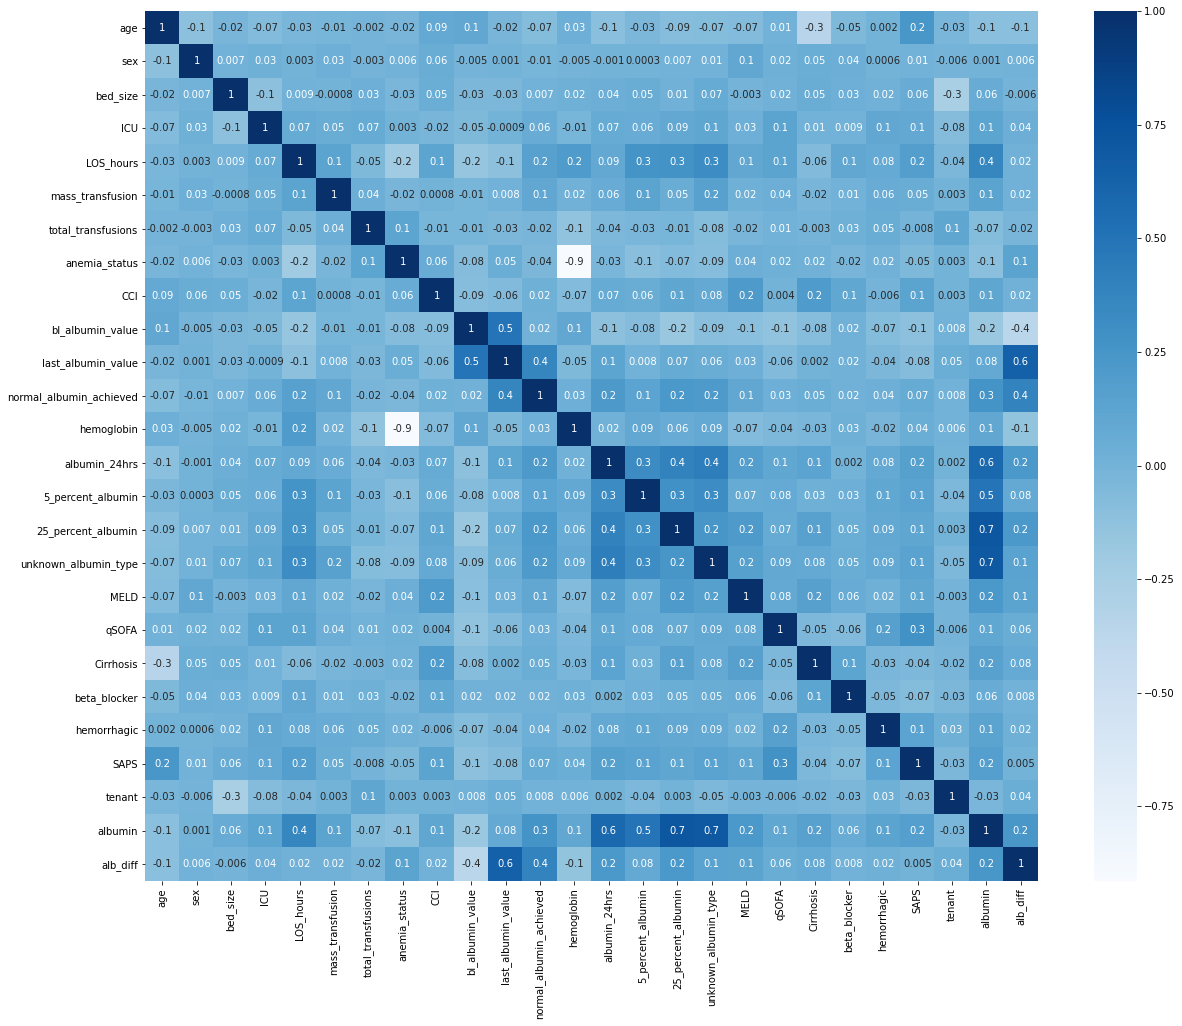

In [105]:
# visualizing correlations with heatmap
plt.figure(figsize=(20,16))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt='.1g')

## Statistical Significance: P-values

In [106]:
df.head()

age  sex  bed_size  ICU    LOS_hours  mass_transfusion  \
0  45.0    1       5.0    1  1016.016667                 0   
1  73.0    1       4.0    0   135.266667                 0   
2  44.0    1       5.0    0   884.533333                 0   
4  75.0    1       5.0    1   675.250000                 0   
5  65.0    1       4.0    0   445.299444                 0   

   total_transfusions  anemia_status  CCI  bl_albumin_value  \
0                   1            2.0    6               2.9   
1                   0            3.0    2               1.5   
2                   0            2.0    3               1.5   
4                   1            1.0    1               1.5   
5                   0            2.0   10               2.3   

   last_albumin_value  normal_albumin_achieved  hemoglobin  albumin_24hrs  \
0                 3.2                      1.0         8.4            0.0   
1                 1.8                      0.0         5.6            0.0   
2                 3.5                      1.0         8.3            0.0   
4                 2.0                      0.0        10.0            0.0   
5                 3.8                      1.0         7.9            0.0   

   5_percent_albumin  25_percent_albumin  unknown_albumin_type  MELD  qSOFA  \
0                0.0                 0.0                   1.0  11.0      1   
1                0.0                 1.0                   0.0   9.0      0   
2                0.0                 1.0                   0.0  18.0      3   
4                1.0                 1.0                   1.0   7.0      2   
5                0.0                 1.0                   0.0  11.0      0   

   Cirrhosis  beta_blocker  hemorrhagic  SAPS  tenant  albumin  alb_diff  
0          0             1            0    34      45        1       0.3  
1          1             0            0    43     111        1       0.3  
2          0             1            0    45      63        1       2.0  
4          0             1            0    24      45        1       0.5  
5          0             0            0    24      66        1       1.5

In [107]:
ivs = df.columns.tolist()
print(ivs)

['age', 'sex', 'bed_size', 'ICU', 'LOS_hours', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI', 'bl_albumin_value', 'last_albumin_value', 'normal_albumin_achieved', 'hemoglobin', 'albumin_24hrs', '5_percent_albumin', '25_percent_albumin', 'unknown_albumin_type', 'MELD', 'qSOFA', 'Cirrhosis', 'beta_blocker', 'hemorrhagic', 'SAPS', 'tenant', 'albumin', 'alb_diff']


In [108]:
sig_df = []

for iv in ivs:
    r, p = stats.pearsonr(df['LOS_hours'], df[iv])
    lst = [iv, r, p]
    sig_df.append(lst)

sig_df = pd.DataFrame(sig_df, columns=['Var', 'Corr', 'p-value'])

In [109]:
sig_df

Var      Corr        p-value
0                       age -0.026692   1.806314e-02
1                       sex  0.002916   7.962281e-01
2                  bed_size  0.008834   4.339656e-01
3                       ICU  0.069196   8.483648e-10
4                 LOS_hours  1.000000   0.000000e+00
5          mass_transfusion  0.129664   9.079257e-31
6        total_transfusions -0.050500   7.629674e-06
7             anemia_status -0.204631   6.057538e-75
8                       CCI  0.123447   5.048159e-28
9          bl_albumin_value -0.152313   6.151109e-42
10       last_albumin_value -0.109866   1.676296e-22
11  normal_albumin_achieved  0.150779   4.013235e-41
12               hemoglobin  0.202505   2.114288e-73
13            albumin_24hrs  0.094255   5.952009e-17
14        5_percent_albumin  0.262130  1.918530e-123
15       25_percent_albumin  0.268424  1.426085e-129
16     unknown_albumin_type  0.319287  2.019482e-185
17                     MELD  0.099257   1.225800e-18
18                    qSOFA  0.127703   6.894854e-30
19                Cirrhosis -0.061509   4.964429e-08
20             beta_blocker  0.097200   6.198672e-18
21              hemorrhagic  0.079344   1.948620e-12
22                     SAPS  0.180727   1.360457e-58
23                   tenant -0.038410   6.666562e-04
24                  albumin  0.370050  3.507290e-253
25                 alb_diff  0.016866   1.352125e-01

In [110]:
sig = sig_df.loc[sig_df['p-value'] <= 0.05]
sig

Var      Corr        p-value
0                       age -0.026692   1.806314e-02
3                       ICU  0.069196   8.483648e-10
4                 LOS_hours  1.000000   0.000000e+00
5          mass_transfusion  0.129664   9.079257e-31
6        total_transfusions -0.050500   7.629674e-06
7             anemia_status -0.204631   6.057538e-75
8                       CCI  0.123447   5.048159e-28
9          bl_albumin_value -0.152313   6.151109e-42
10       last_albumin_value -0.109866   1.676296e-22
11  normal_albumin_achieved  0.150779   4.013235e-41
12               hemoglobin  0.202505   2.114288e-73
13            albumin_24hrs  0.094255   5.952009e-17
14        5_percent_albumin  0.262130  1.918530e-123
15       25_percent_albumin  0.268424  1.426085e-129
16     unknown_albumin_type  0.319287  2.019482e-185
17                     MELD  0.099257   1.225800e-18
18                    qSOFA  0.127703   6.894854e-30
19                Cirrhosis -0.061509   4.964429e-08
20             beta_blocker  0.097200   6.198672e-18
21              hemorrhagic  0.079344   1.948620e-12
22                     SAPS  0.180727   1.360457e-58
23                   tenant -0.038410   6.666562e-04
24                  albumin  0.370050  3.507290e-253

In [111]:
ins = sig_df.loc[sig_df['p-value'] > 0.05]
ins

Var      Corr   p-value
1        sex  0.002916  0.796228
2   bed_size  0.008834  0.433966
25  alb_diff  0.016866  0.135212

## ICU Length of Stay (ICU LOS)

In [112]:
# drop other dvs: 30_day_mortality, 30_day_readmission, etc

df = f_df.drop(columns=['30_day_mortality', '30_day_readmission', \
                       'LOS_hours', 'days_until_readmission'])

In [113]:
df.head()

age  sex  bed_size  ICU  total_ICU_LOS_hours  mass_transfusion  \
0  45.0    1       5.0    1          7956.633333                 0   
1  73.0    1       4.0    0             0.000000                 0   
2  44.0    1       5.0    0             0.000000                 0   
4  75.0    1       5.0    1          5144.516667                 0   
5  65.0    1       4.0    0             0.000000                 0   

   total_transfusions  anemia_status  CCI  bl_albumin_value  \
0                   1            2.0    6               2.9   
1                   0            3.0    2               1.5   
2                   0            2.0    3               1.5   
4                   1            1.0    1               1.5   
5                   0            2.0   10               2.3   

   last_albumin_value  normal_albumin_achieved  hemoglobin  albumin_24hrs  \
0                 3.2                      1.0         8.4            0.0   
1                 1.8                      0.0         5.6            0.0   
2                 3.5                      1.0         8.3            0.0   
4                 2.0                      0.0        10.0            0.0   
5                 3.8                      1.0         7.9            0.0   

   5_percent_albumin  25_percent_albumin  unknown_albumin_type  MELD  qSOFA  \
0                0.0                 0.0                   1.0  11.0      1   
1                0.0                 1.0                   0.0   9.0      0   
2                0.0                 1.0                   0.0  18.0      3   
4                1.0                 1.0                   1.0   7.0      2   
5                0.0                 1.0                   0.0  11.0      0   

   Cirrhosis  beta_blocker  hemorrhagic  SAPS  tenant  albumin  alb_diff  
0          0             1            0    34      45        1       0.3  
1          1             0            0    43     111        1       0.3  
2          0             1            0    45      63        1       2.0  
4          0             1            0    24      45        1       0.5  
5          0             0            0    24      66        1       1.5

In [114]:
df['albumin_24hrs'].describe()

count    7846.000000
mean        0.080423
std         0.271965
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: albumin_24hrs, dtype: float64

## Correlations

In [115]:
df.head()

age  sex  bed_size  ICU  total_ICU_LOS_hours  mass_transfusion  \
0  45.0    1       5.0    1          7956.633333                 0   
1  73.0    1       4.0    0             0.000000                 0   
2  44.0    1       5.0    0             0.000000                 0   
4  75.0    1       5.0    1          5144.516667                 0   
5  65.0    1       4.0    0             0.000000                 0   

   total_transfusions  anemia_status  CCI  bl_albumin_value  \
0                   1            2.0    6               2.9   
1                   0            3.0    2               1.5   
2                   0            2.0    3               1.5   
4                   1            1.0    1               1.5   
5                   0            2.0   10               2.3   

   last_albumin_value  normal_albumin_achieved  hemoglobin  albumin_24hrs  \
0                 3.2                      1.0         8.4            0.0   
1                 1.8                      0.0         5.6            0.0   
2                 3.5                      1.0         8.3            0.0   
4                 2.0                      0.0        10.0            0.0   
5                 3.8                      1.0         7.9            0.0   

   5_percent_albumin  25_percent_albumin  unknown_albumin_type  MELD  qSOFA  \
0                0.0                 0.0                   1.0  11.0      1   
1                0.0                 1.0                   0.0   9.0      0   
2                0.0                 1.0                   0.0  18.0      3   
4                1.0                 1.0                   1.0   7.0      2   
5                0.0                 1.0                   0.0  11.0      0   

   Cirrhosis  beta_blocker  hemorrhagic  SAPS  tenant  albumin  alb_diff  
0          0             1            0    34      45        1       0.3  
1          1             0            0    43     111        1       0.3  
2          0             1            0    45      63        1       2.0  
4          0             1            0    24      45        1       0.5  
5          0             0            0    24      66        1       1.5

In [116]:
# look at variable correlations with total_ICU_LOS_hours
corr_mat = df.corr()['total_ICU_LOS_hours']
sorted_mat = corr_mat.sort_values()
print(sorted_mat)

anemia_status             -0.081871
bed_size                  -0.073656
age                       -0.048462
bl_albumin_value          -0.046032
Cirrhosis                 -0.022497
last_albumin_value        -0.021697
tenant                    -0.019770
alb_diff                   0.017482
sex                        0.020302
CCI                        0.021416
total_transfusions         0.022520
MELD                       0.037877
albumin_24hrs              0.037972
beta_blocker               0.048356
normal_albumin_achieved    0.061230
hemorrhagic                0.063053
SAPS                       0.066187
hemoglobin                 0.078666
qSOFA                      0.091563
mass_transfusion           0.105689
5_percent_albumin          0.113362
25_percent_albumin         0.127016
albumin                    0.182153
unknown_albumin_type       0.184665
ICU                        0.523847
total_ICU_LOS_hours        1.000000
Name: total_ICU_LOS_hours, dtype: float64


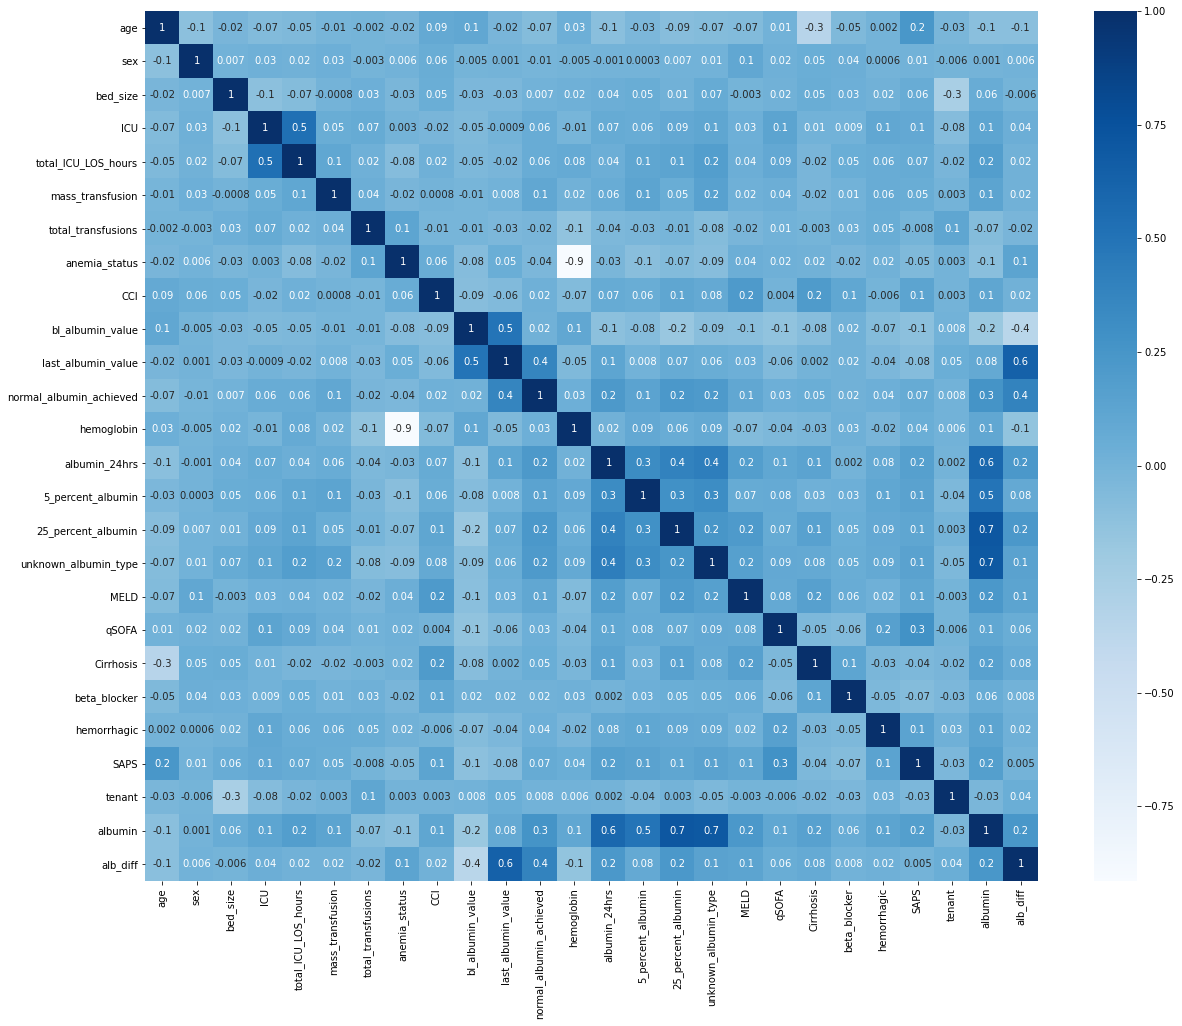

In [117]:
# visualizing correlations with heatmap
plt.figure(figsize=(20,16))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt='.1g')

## Statistical Significance: P-values

In [118]:
df.head()

age  sex  bed_size  ICU  total_ICU_LOS_hours  mass_transfusion  \
0  45.0    1       5.0    1          7956.633333                 0   
1  73.0    1       4.0    0             0.000000                 0   
2  44.0    1       5.0    0             0.000000                 0   
4  75.0    1       5.0    1          5144.516667                 0   
5  65.0    1       4.0    0             0.000000                 0   

   total_transfusions  anemia_status  CCI  bl_albumin_value  \
0                   1            2.0    6               2.9   
1                   0            3.0    2               1.5   
2                   0            2.0    3               1.5   
4                   1            1.0    1               1.5   
5                   0            2.0   10               2.3   

   last_albumin_value  normal_albumin_achieved  hemoglobin  albumin_24hrs  \
0                 3.2                      1.0         8.4            0.0   
1                 1.8                      0.0         5.6            0.0   
2                 3.5                      1.0         8.3            0.0   
4                 2.0                      0.0        10.0            0.0   
5                 3.8                      1.0         7.9            0.0   

   5_percent_albumin  25_percent_albumin  unknown_albumin_type  MELD  qSOFA  \
0                0.0                 0.0                   1.0  11.0      1   
1                0.0                 1.0                   0.0   9.0      0   
2                0.0                 1.0                   0.0  18.0      3   
4                1.0                 1.0                   1.0   7.0      2   
5                0.0                 1.0                   0.0  11.0      0   

   Cirrhosis  beta_blocker  hemorrhagic  SAPS  tenant  albumin  alb_diff  
0          0             1            0    34      45        1       0.3  
1          1             0            0    43     111        1       0.3  
2          0             1            0    45      63        1       2.0  
4          0             1            0    24      45        1       0.5  
5          0             0            0    24      66        1       1.5

In [119]:
ivs = df.columns.tolist()
print(ivs)

['age', 'sex', 'bed_size', 'ICU', 'total_ICU_LOS_hours', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI', 'bl_albumin_value', 'last_albumin_value', 'normal_albumin_achieved', 'hemoglobin', 'albumin_24hrs', '5_percent_albumin', '25_percent_albumin', 'unknown_albumin_type', 'MELD', 'qSOFA', 'Cirrhosis', 'beta_blocker', 'hemorrhagic', 'SAPS', 'tenant', 'albumin', 'alb_diff']


In [120]:
sig_df = []

for iv in ivs:
    r, p = stats.pearsonr(df['total_ICU_LOS_hours'], df[iv])
    lst = [iv, r, p]
    sig_df.append(lst)

sig_df = pd.DataFrame(sig_df, columns=['Var', 'Corr', 'p-value'])

In [121]:
sig_df

Var      Corr       p-value
0                       age -0.048462  1.751167e-05
1                       sex  0.020302  7.215175e-02
2                  bed_size -0.073656  6.484499e-11
3                       ICU  0.523847  0.000000e+00
4       total_ICU_LOS_hours  1.000000  0.000000e+00
5          mass_transfusion  0.105689  6.202723e-21
6        total_transfusions  0.022520  4.607503e-02
7             anemia_status -0.081871  3.786249e-13
8                       CCI  0.021416  5.784346e-02
9          bl_albumin_value -0.046032  4.524503e-05
10       last_albumin_value -0.021697  5.462771e-02
11  normal_albumin_achieved  0.061230  5.704817e-08
12               hemoglobin  0.078666  3.000101e-12
13            albumin_24hrs  0.037972  7.677364e-04
14        5_percent_albumin  0.113362  7.329261e-24
15       25_percent_albumin  0.127016  1.392224e-29
16     unknown_albumin_type  0.184665  3.880265e-61
17                     MELD  0.037877  7.916852e-04
18                    qSOFA  0.091563  4.429070e-16
19                Cirrhosis -0.022497  4.629964e-02
20             beta_blocker  0.048356  1.826671e-05
21              hemorrhagic  0.063053  2.273306e-08
22                     SAPS  0.066187  4.404976e-09
23                   tenant -0.019770  7.993017e-02
24                  albumin  0.182153  1.654894e-59
25                 alb_diff  0.017482  1.215397e-01

In [122]:
sig = sig_df.loc[sig_df['p-value'] <= 0.05]
sig

Var      Corr       p-value
0                       age -0.048462  1.751167e-05
2                  bed_size -0.073656  6.484499e-11
3                       ICU  0.523847  0.000000e+00
4       total_ICU_LOS_hours  1.000000  0.000000e+00
5          mass_transfusion  0.105689  6.202723e-21
6        total_transfusions  0.022520  4.607503e-02
7             anemia_status -0.081871  3.786249e-13
9          bl_albumin_value -0.046032  4.524503e-05
11  normal_albumin_achieved  0.061230  5.704817e-08
12               hemoglobin  0.078666  3.000101e-12
13            albumin_24hrs  0.037972  7.677364e-04
14        5_percent_albumin  0.113362  7.329261e-24
15       25_percent_albumin  0.127016  1.392224e-29
16     unknown_albumin_type  0.184665  3.880265e-61
17                     MELD  0.037877  7.916852e-04
18                    qSOFA  0.091563  4.429070e-16
19                Cirrhosis -0.022497  4.629964e-02
20             beta_blocker  0.048356  1.826671e-05
21              hemorrhagic  0.063053  2.273306e-08
22                     SAPS  0.066187  4.404976e-09
24                  albumin  0.182153  1.654894e-59

In [123]:
ins = sig_df.loc[sig_df['p-value'] > 0.05]
ins

Var      Corr   p-value
1                  sex  0.020302  0.072152
8                  CCI  0.021416  0.057843
10  last_albumin_value -0.021697  0.054628
23              tenant -0.019770  0.079930
25            alb_diff  0.017482  0.121540

## 30D Mortality

In [124]:
# drop other dvs: LOS_hours, 30_day_readmission

df = f_df.drop(columns=['LOS_hours', '30_day_readmission', \
                       'total_ICU_LOS_hours', 'days_until_readmission'])

In [125]:
df.head()

age  sex  bed_size  ICU  mass_transfusion  total_transfusions  \
0  45.0    1       5.0    1                 0                   1   
1  73.0    1       4.0    0                 0                   0   
2  44.0    1       5.0    0                 0                   0   
4  75.0    1       5.0    1                 0                   1   
5  65.0    1       4.0    0                 0                   0   

   anemia_status  CCI  30_day_mortality  bl_albumin_value  last_albumin_value  \
0            2.0    6                 0               2.9                 3.2   
1            3.0    2                 0               1.5                 1.8   
2            2.0    3                 0               1.5                 3.5   
4            1.0    1                 0               1.5                 2.0   
5            2.0   10                 0               2.3                 3.8   

   normal_albumin_achieved  hemoglobin  albumin_24hrs  5_percent_albumin  \
0                      1.0         8.4            0.0                0.0   
1                      0.0         5.6            0.0                0.0   
2                      1.0         8.3            0.0                0.0   
4                      0.0        10.0            0.0                1.0   
5                      1.0         7.9            0.0                0.0   

   25_percent_albumin  unknown_albumin_type  MELD  qSOFA  Cirrhosis  \
0                 0.0                   1.0  11.0      1          0   
1                 1.0                   0.0   9.0      0          1   
2                 1.0                   0.0  18.0      3          0   
4                 1.0                   1.0   7.0      2          0   
5                 1.0                   0.0  11.0      0          0   

   beta_blocker  hemorrhagic  SAPS  tenant  albumin  alb_diff  
0             1            0    34      45        1       0.3  
1             0            0    43     111        1       0.3  
2             1            0    45      63        1       2.0  
4             1            0    24      45        1       0.5  
5             0            0    24      66        1       1.5

## Correlations

In [126]:
# look at variable correlations with 30 day mortality
corr_mat = f_df.corr()['30_day_mortality']
sorted_mat = corr_mat.sort_values()
print(sorted_mat)

days_until_readmission    -0.129087
last_albumin_value        -0.106930
bl_albumin_value          -0.071522
alb_diff                  -0.051640
beta_blocker              -0.048354
anemia_status             -0.027906
tenant                    -0.021239
total_transfusions        -0.020736
Cirrhosis                  0.001619
normal_albumin_achieved    0.004456
sex                        0.011625
bed_size                   0.011850
LOS_hours                  0.013366
total_ICU_LOS_hours        0.026841
hemoglobin                 0.030358
ICU                        0.035265
hemorrhagic                0.039148
albumin_24hrs              0.040936
mass_transfusion           0.043522
unknown_albumin_type       0.046842
age                        0.058506
MELD                       0.066783
qSOFA                      0.076705
albumin                    0.080226
5_percent_albumin          0.084072
25_percent_albumin         0.085041
CCI                        0.085715
SAPS                       0

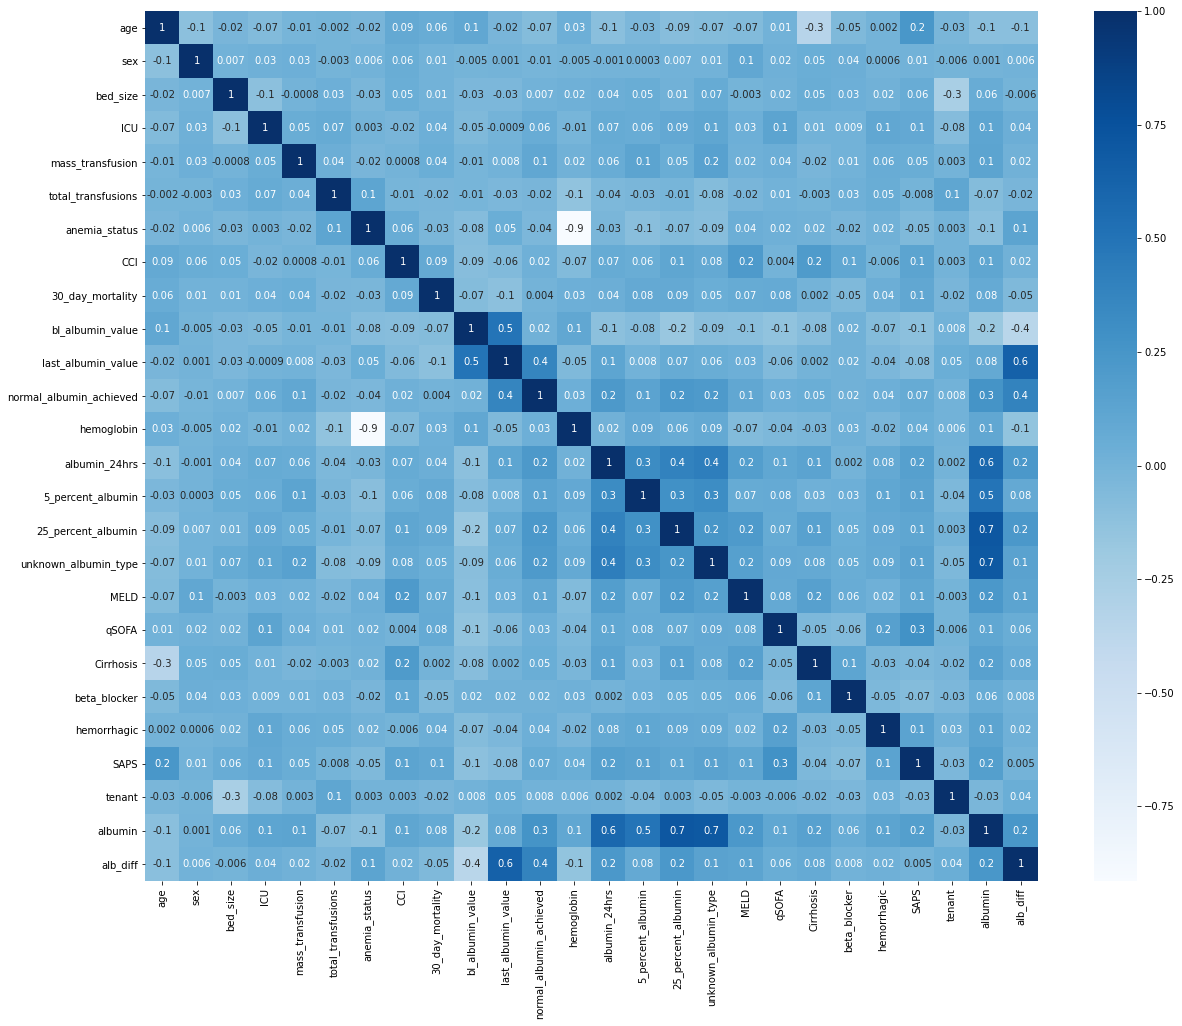

In [127]:
# visualizing correlations with heatmap
plt.figure(figsize=(20,16))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt='.1g')

## Statistical Significance: P-values

In [128]:
df.head()

age  sex  bed_size  ICU  mass_transfusion  total_transfusions  \
0  45.0    1       5.0    1                 0                   1   
1  73.0    1       4.0    0                 0                   0   
2  44.0    1       5.0    0                 0                   0   
4  75.0    1       5.0    1                 0                   1   
5  65.0    1       4.0    0                 0                   0   

   anemia_status  CCI  30_day_mortality  bl_albumin_value  last_albumin_value  \
0            2.0    6                 0               2.9                 3.2   
1            3.0    2                 0               1.5                 1.8   
2            2.0    3                 0               1.5                 3.5   
4            1.0    1                 0               1.5                 2.0   
5            2.0   10                 0               2.3                 3.8   

   normal_albumin_achieved  hemoglobin  albumin_24hrs  5_percent_albumin  \
0                      1.0         8.4            0.0                0.0   
1                      0.0         5.6            0.0                0.0   
2                      1.0         8.3            0.0                0.0   
4                      0.0        10.0            0.0                1.0   
5                      1.0         7.9            0.0                0.0   

   25_percent_albumin  unknown_albumin_type  MELD  qSOFA  Cirrhosis  \
0                 0.0                   1.0  11.0      1          0   
1                 1.0                   0.0   9.0      0          1   
2                 1.0                   0.0  18.0      3          0   
4                 1.0                   1.0   7.0      2          0   
5                 1.0                   0.0  11.0      0          0   

   beta_blocker  hemorrhagic  SAPS  tenant  albumin  alb_diff  
0             1            0    34      45        1       0.3  
1             0            0    43     111        1       0.3  
2             1            0    45      63        1       2.0  
4             1            0    24      45        1       0.5  
5             0            0    24      66        1       1.5

In [129]:
ivs = df.columns.tolist()
print(ivs)

['age', 'sex', 'bed_size', 'ICU', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI', '30_day_mortality', 'bl_albumin_value', 'last_albumin_value', 'normal_albumin_achieved', 'hemoglobin', 'albumin_24hrs', '5_percent_albumin', '25_percent_albumin', 'unknown_albumin_type', 'MELD', 'qSOFA', 'Cirrhosis', 'beta_blocker', 'hemorrhagic', 'SAPS', 'tenant', 'albumin', 'alb_diff']


In [130]:
sig_df = []

for iv in ivs:
    r, p = stats.pearsonr(df['30_day_mortality'], df[iv])
    lst = [iv, r, p]
    sig_df.append(lst)

sig_df = pd.DataFrame(sig_df, columns=['Var', 'Corr', 'p-value'])

In [131]:
sig_df

Var      Corr       p-value
0                       age  0.058506  2.149737e-07
1                       sex  0.011625  3.031864e-01
2                  bed_size  0.011850  2.939228e-01
3                       ICU  0.035265  1.783094e-03
4          mass_transfusion  0.043522  1.151221e-04
5        total_transfusions -0.020736  6.626550e-02
6             anemia_status -0.027906  1.343989e-02
7                       CCI  0.085715  2.844313e-14
8          30_day_mortality  1.000000  0.000000e+00
9          bl_albumin_value -0.071522  2.263110e-10
10       last_albumin_value -0.106930  2.153645e-21
11  normal_albumin_achieved  0.004456  6.930876e-01
12               hemoglobin  0.030358  7.162249e-03
13            albumin_24hrs  0.040936  2.868176e-04
14        5_percent_albumin  0.084072  8.723982e-14
15       25_percent_albumin  0.085041  4.514493e-14
16     unknown_albumin_type  0.046842  3.313068e-05
17                     MELD  0.066783  3.197375e-09
18                    qSOFA  0.076705  1.022599e-11
19                Cirrhosis  0.001619  8.860034e-01
20             beta_blocker -0.048354  1.828383e-05
21              hemorrhagic  0.039148  5.235443e-04
22                     SAPS  0.100851  3.410863e-19
23                   tenant -0.021239  5.994066e-02
24                  albumin  0.080226  1.106304e-12
25                 alb_diff -0.051640  4.728086e-06

In [132]:
sig = sig_df.loc[sig_df['p-value'] <= 0.05]
sig

Var      Corr       p-value
0                    age  0.058506  2.149737e-07
3                    ICU  0.035265  1.783094e-03
4       mass_transfusion  0.043522  1.151221e-04
6          anemia_status -0.027906  1.343989e-02
7                    CCI  0.085715  2.844313e-14
8       30_day_mortality  1.000000  0.000000e+00
9       bl_albumin_value -0.071522  2.263110e-10
10    last_albumin_value -0.106930  2.153645e-21
12            hemoglobin  0.030358  7.162249e-03
13         albumin_24hrs  0.040936  2.868176e-04
14     5_percent_albumin  0.084072  8.723982e-14
15    25_percent_albumin  0.085041  4.514493e-14
16  unknown_albumin_type  0.046842  3.313068e-05
17                  MELD  0.066783  3.197375e-09
18                 qSOFA  0.076705  1.022599e-11
20          beta_blocker -0.048354  1.828383e-05
21           hemorrhagic  0.039148  5.235443e-04
22                  SAPS  0.100851  3.410863e-19
24               albumin  0.080226  1.106304e-12
25              alb_diff -0.051640  4.728086e-06

In [133]:
ins = sig_df.loc[sig_df['p-value'] > 0.05]
ins

Var      Corr   p-value
1                       sex  0.011625  0.303186
2                  bed_size  0.011850  0.293923
5        total_transfusions -0.020736  0.066265
11  normal_albumin_achieved  0.004456  0.693088
19                Cirrhosis  0.001619  0.886003
23                   tenant -0.021239  0.059941

## 30D Readmission

In [134]:
# drop other dvs: LOS_hours, 30_day_mortality

df = f_df.drop(columns=['LOS_hours', '30_day_mortality', \
                       'total_ICU_LOS_hours', 'days_until_readmission'])

In [135]:
df.head()

age  sex  bed_size  ICU  mass_transfusion  total_transfusions  \
0  45.0    1       5.0    1                 0                   1   
1  73.0    1       4.0    0                 0                   0   
2  44.0    1       5.0    0                 0                   0   
4  75.0    1       5.0    1                 0                   1   
5  65.0    1       4.0    0                 0                   0   

   anemia_status  CCI  30_day_readmission  bl_albumin_value  \
0            2.0    6                   0               2.9   
1            3.0    2                   0               1.5   
2            2.0    3                   0               1.5   
4            1.0    1                   0               1.5   
5            2.0   10                   0               2.3   

   last_albumin_value  normal_albumin_achieved  hemoglobin  albumin_24hrs  \
0                 3.2                      1.0         8.4            0.0   
1                 1.8                      0.0         5.6            0.0   
2                 3.5                      1.0         8.3            0.0   
4                 2.0                      0.0        10.0            0.0   
5                 3.8                      1.0         7.9            0.0   

   5_percent_albumin  25_percent_albumin  unknown_albumin_type  MELD  qSOFA  \
0                0.0                 0.0                   1.0  11.0      1   
1                0.0                 1.0                   0.0   9.0      0   
2                0.0                 1.0                   0.0  18.0      3   
4                1.0                 1.0                   1.0   7.0      2   
5                0.0                 1.0                   0.0  11.0      0   

   Cirrhosis  beta_blocker  hemorrhagic  SAPS  tenant  albumin  alb_diff  
0          0             1            0    34      45        1       0.3  
1          1             0            0    43     111        1       0.3  
2          0             1            0    45      63        1       2.0  
4          0             1            0    24      45        1       0.5  
5          0             0            0    24      66        1       1.5

## Correlations

In [136]:
# look at variable correlations with 30 day readmission
corr_mat = df.corr()['30_day_readmission']
sorted_mat = corr_mat.sort_values()
print(sorted_mat)

last_albumin_value        -0.074607
bl_albumin_value          -0.065618
tenant                    -0.062614
hemoglobin                -0.022576
alb_diff                  -0.022089
beta_blocker              -0.015166
5_percent_albumin         -0.007022
normal_albumin_achieved    0.000258
mass_transfusion           0.001552
age                        0.006775
unknown_albumin_type       0.008948
Cirrhosis                  0.008976
MELD                       0.011644
hemorrhagic                0.015793
sex                        0.019489
qSOFA                      0.020021
SAPS                       0.023491
albumin                    0.024474
albumin_24hrs              0.025259
anemia_status              0.027630
ICU                        0.028184
25_percent_albumin         0.037583
CCI                        0.074639
total_transfusions         0.081342
bed_size                   0.100447
30_day_readmission         1.000000
Name: 30_day_readmission, dtype: float64


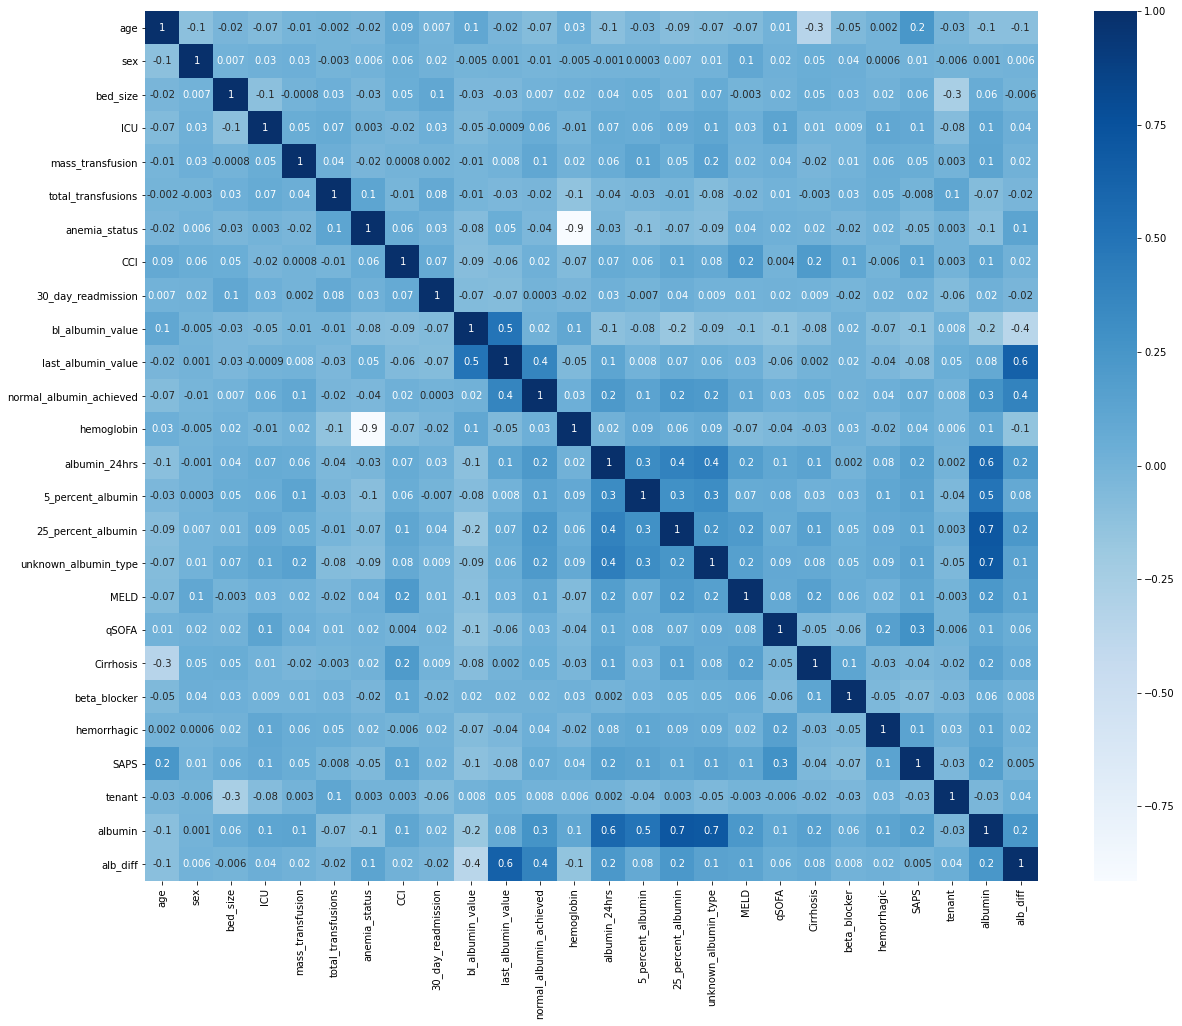

In [137]:
# visualizing correlations with heatmap
plt.figure(figsize=(20,16))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt='.1g')

## Statistical Significance: P-values

In [138]:
df.head()

age  sex  bed_size  ICU  mass_transfusion  total_transfusions  \
0  45.0    1       5.0    1                 0                   1   
1  73.0    1       4.0    0                 0                   0   
2  44.0    1       5.0    0                 0                   0   
4  75.0    1       5.0    1                 0                   1   
5  65.0    1       4.0    0                 0                   0   

   anemia_status  CCI  30_day_readmission  bl_albumin_value  \
0            2.0    6                   0               2.9   
1            3.0    2                   0               1.5   
2            2.0    3                   0               1.5   
4            1.0    1                   0               1.5   
5            2.0   10                   0               2.3   

   last_albumin_value  normal_albumin_achieved  hemoglobin  albumin_24hrs  \
0                 3.2                      1.0         8.4            0.0   
1                 1.8                      0.0         5.6            0.0   
2                 3.5                      1.0         8.3            0.0   
4                 2.0                      0.0        10.0            0.0   
5                 3.8                      1.0         7.9            0.0   

   5_percent_albumin  25_percent_albumin  unknown_albumin_type  MELD  qSOFA  \
0                0.0                 0.0                   1.0  11.0      1   
1                0.0                 1.0                   0.0   9.0      0   
2                0.0                 1.0                   0.0  18.0      3   
4                1.0                 1.0                   1.0   7.0      2   
5                0.0                 1.0                   0.0  11.0      0   

   Cirrhosis  beta_blocker  hemorrhagic  SAPS  tenant  albumin  alb_diff  
0          0             1            0    34      45        1       0.3  
1          1             0            0    43     111        1       0.3  
2          0             1            0    45      63        1       2.0  
4          0             1            0    24      45        1       0.5  
5          0             0            0    24      66        1       1.5

In [139]:
ivs = df.columns.tolist()
print(ivs)

['age', 'sex', 'bed_size', 'ICU', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI', '30_day_readmission', 'bl_albumin_value', 'last_albumin_value', 'normal_albumin_achieved', 'hemoglobin', 'albumin_24hrs', '5_percent_albumin', '25_percent_albumin', 'unknown_albumin_type', 'MELD', 'qSOFA', 'Cirrhosis', 'beta_blocker', 'hemorrhagic', 'SAPS', 'tenant', 'albumin', 'alb_diff']


In [140]:
sig_df = []

for iv in ivs:
    r, p = stats.pearsonr(df['30_day_readmission'], df[iv])
    lst = [iv, r, p]
    sig_df.append(lst)

sig_df = pd.DataFrame(sig_df, columns=['Var', 'Corr', 'p-value'])

In [141]:
sig_df

Var      Corr       p-value
0                       age  0.006775  5.485111e-01
1                       sex  0.019489  8.431798e-02
2                  bed_size  0.100447  4.727303e-19
3                       ICU  0.028184  1.254049e-02
4          mass_transfusion  0.001552  8.906698e-01
5        total_transfusions  0.081342  5.359178e-13
6             anemia_status  0.027630  1.438505e-02
7                       CCI  0.074639  3.604067e-11
8        30_day_readmission  1.000000  0.000000e+00
9          bl_albumin_value -0.065618  5.967193e-09
10       last_albumin_value -0.074607  3.673490e-11
11  normal_albumin_achieved  0.000258  9.817600e-01
12               hemoglobin -0.022576  4.553270e-02
13            albumin_24hrs  0.025259  2.525930e-02
14        5_percent_albumin -0.007022  5.340183e-01
15       25_percent_albumin  0.037583  8.695939e-04
16     unknown_albumin_type  0.008948  4.280699e-01
17                     MELD  0.011644  3.024333e-01
18                    qSOFA  0.020021  7.617731e-02
19                Cirrhosis  0.008976  4.266290e-01
20             beta_blocker -0.015166  1.791829e-01
21              hemorrhagic  0.015793  1.618861e-01
22                     SAPS  0.023491  3.745959e-02
23                   tenant -0.062614  2.844190e-08
24                  albumin  0.024474  3.017143e-02
25                 alb_diff -0.022089  5.040541e-02

In [142]:
sig = sig_df.loc[sig_df['p-value'] <= 0.05]
sig

Var      Corr       p-value
2             bed_size  0.100447  4.727303e-19
3                  ICU  0.028184  1.254049e-02
5   total_transfusions  0.081342  5.359178e-13
6        anemia_status  0.027630  1.438505e-02
7                  CCI  0.074639  3.604067e-11
8   30_day_readmission  1.000000  0.000000e+00
9     bl_albumin_value -0.065618  5.967193e-09
10  last_albumin_value -0.074607  3.673490e-11
12          hemoglobin -0.022576  4.553270e-02
13       albumin_24hrs  0.025259  2.525930e-02
15  25_percent_albumin  0.037583  8.695939e-04
22                SAPS  0.023491  3.745959e-02
23              tenant -0.062614  2.844190e-08
24             albumin  0.024474  3.017143e-02

In [143]:
ins = sig_df.loc[sig_df['p-value'] > 0.05]
ins

Var      Corr   p-value
0                       age  0.006775  0.548511
1                       sex  0.019489  0.084318
4          mass_transfusion  0.001552  0.890670
11  normal_albumin_achieved  0.000258  0.981760
14        5_percent_albumin -0.007022  0.534018
16     unknown_albumin_type  0.008948  0.428070
17                     MELD  0.011644  0.302433
18                    qSOFA  0.020021  0.076177
19                Cirrhosis  0.008976  0.426629
20             beta_blocker -0.015166  0.179183
21              hemorrhagic  0.015793  0.161886
25                 alb_diff -0.022089  0.050405

## Days Until Readmission

In [144]:
# drop other dvs: LOS_hours, 30_day_mortality

df = f_df.drop(columns=['LOS_hours', '30_day_mortality', \
                       'total_ICU_LOS_hours', '30_day_readmission'])

In [145]:
df.head()

age  sex  bed_size  ICU  mass_transfusion  total_transfusions  \
0  45.0    1       5.0    1                 0                   1   
1  73.0    1       4.0    0                 0                   0   
2  44.0    1       5.0    0                 0                   0   
4  75.0    1       5.0    1                 0                   1   
5  65.0    1       4.0    0                 0                   0   

   anemia_status  CCI  days_until_readmission  bl_albumin_value  \
0            2.0    6              758.111111               2.9   
1            3.0    2              771.349306               1.5   
2            2.0    3              524.800694               1.5   
4            1.0    1              367.208333               1.5   
5            2.0   10               31.495741               2.3   

   last_albumin_value  normal_albumin_achieved  hemoglobin  albumin_24hrs  \
0                 3.2                      1.0         8.4            0.0   
1                 1.8                      0.0         5.6            0.0   
2                 3.5                      1.0         8.3            0.0   
4                 2.0                      0.0        10.0            0.0   
5                 3.8                      1.0         7.9            0.0   

   5_percent_albumin  25_percent_albumin  unknown_albumin_type  MELD  qSOFA  \
0                0.0                 0.0                   1.0  11.0      1   
1                0.0                 1.0                   0.0   9.0      0   
2                0.0                 1.0                   0.0  18.0      3   
4                1.0                 1.0                   1.0   7.0      2   
5                0.0                 1.0                   0.0  11.0      0   

   Cirrhosis  beta_blocker  hemorrhagic  SAPS  tenant  albumin  alb_diff  
0          0             1            0    34      45        1       0.3  
1          1             0            0    43     111        1       0.3  
2          0             1            0    45      63        1       2.0  
4          0             1            0    24      45        1       0.5  
5          0             0            0    24      66        1       1.5

## Correlations

In [146]:
# look at variable correlations with days_until_readmission
corr_mat = df.corr()['days_until_readmission']
sorted_mat = corr_mat.sort_values()
print(sorted_mat)

CCI                       -0.141980
albumin                   -0.067444
SAPS                      -0.055324
25_percent_albumin        -0.051344
MELD                      -0.049649
unknown_albumin_type      -0.048651
total_transfusions        -0.048196
bed_size                  -0.044007
albumin_24hrs             -0.039503
Cirrhosis                 -0.033857
5_percent_albumin         -0.022679
qSOFA                     -0.018700
ICU                       -0.011524
anemia_status             -0.009724
normal_albumin_achieved   -0.009679
sex                       -0.009609
hemorrhagic               -0.007020
mass_transfusion          -0.006773
beta_blocker              -0.004518
alb_diff                   0.001092
hemoglobin                 0.011279
age                        0.018233
tenant                     0.041566
last_albumin_value         0.077496
bl_albumin_value           0.092794
days_until_readmission     1.000000
Name: days_until_readmission, dtype: float64


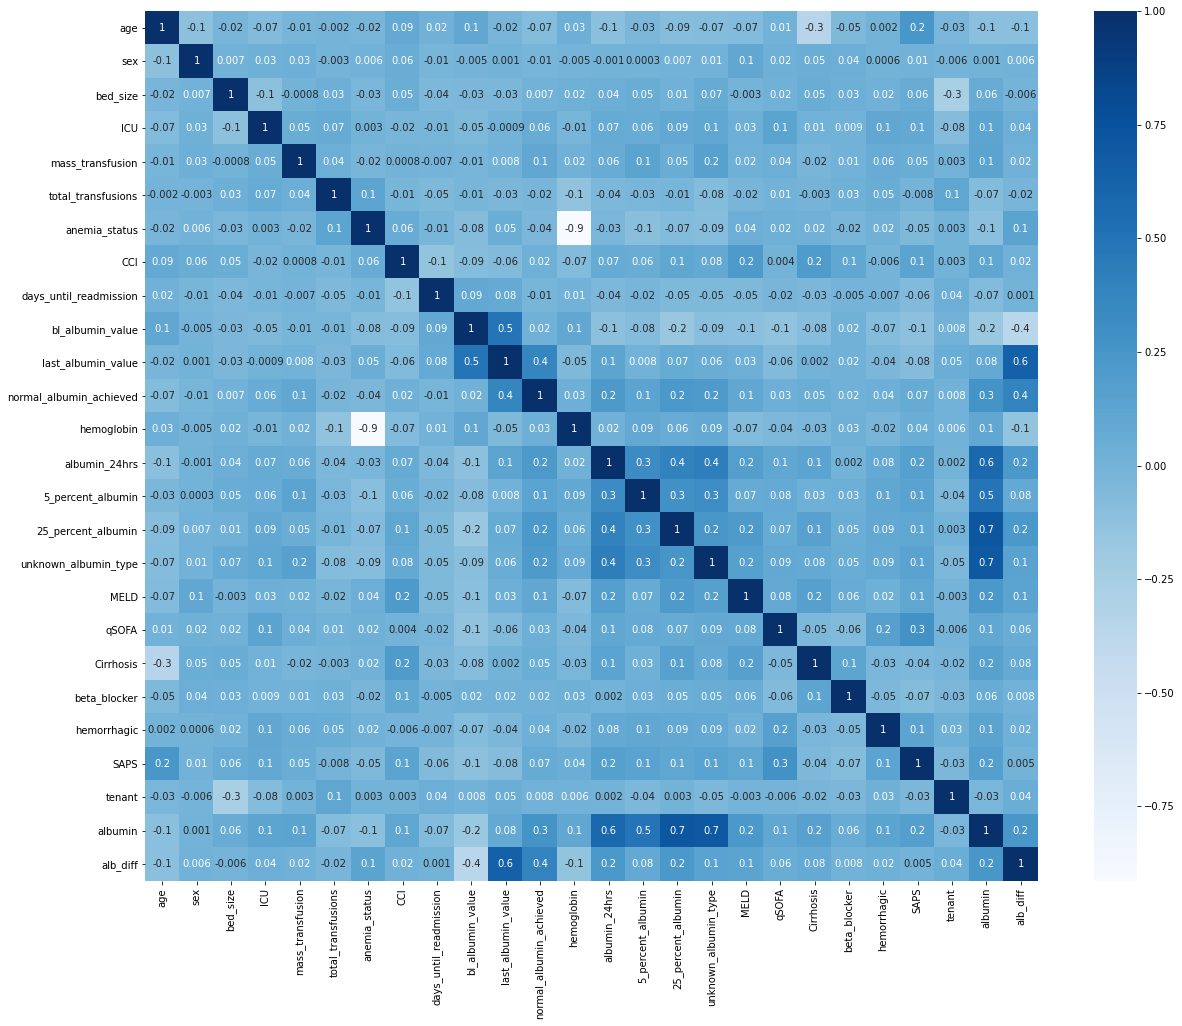

In [147]:
# visualizing correlations with heatmap
plt.figure(figsize=(20,16))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt='.1g')

## Statistical Significance: P-values

In [148]:
df.head()

age  sex  bed_size  ICU  mass_transfusion  total_transfusions  \
0  45.0    1       5.0    1                 0                   1   
1  73.0    1       4.0    0                 0                   0   
2  44.0    1       5.0    0                 0                   0   
4  75.0    1       5.0    1                 0                   1   
5  65.0    1       4.0    0                 0                   0   

   anemia_status  CCI  days_until_readmission  bl_albumin_value  \
0            2.0    6              758.111111               2.9   
1            3.0    2              771.349306               1.5   
2            2.0    3              524.800694               1.5   
4            1.0    1              367.208333               1.5   
5            2.0   10               31.495741               2.3   

   last_albumin_value  normal_albumin_achieved  hemoglobin  albumin_24hrs  \
0                 3.2                      1.0         8.4            0.0   
1                 1.8                      0.0         5.6            0.0   
2                 3.5                      1.0         8.3            0.0   
4                 2.0                      0.0        10.0            0.0   
5                 3.8                      1.0         7.9            0.0   

   5_percent_albumin  25_percent_albumin  unknown_albumin_type  MELD  qSOFA  \
0                0.0                 0.0                   1.0  11.0      1   
1                0.0                 1.0                   0.0   9.0      0   
2                0.0                 1.0                   0.0  18.0      3   
4                1.0                 1.0                   1.0   7.0      2   
5                0.0                 1.0                   0.0  11.0      0   

   Cirrhosis  beta_blocker  hemorrhagic  SAPS  tenant  albumin  alb_diff  
0          0             1            0    34      45        1       0.3  
1          1             0            0    43     111        1       0.3  
2          0             1            0    45      63        1       2.0  
4          0             1            0    24      45        1       0.5  
5          0             0            0    24      66        1       1.5

In [149]:
ivs = df.columns.tolist()
print(ivs)

['age', 'sex', 'bed_size', 'ICU', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI', 'days_until_readmission', 'bl_albumin_value', 'last_albumin_value', 'normal_albumin_achieved', 'hemoglobin', 'albumin_24hrs', '5_percent_albumin', '25_percent_albumin', 'unknown_albumin_type', 'MELD', 'qSOFA', 'Cirrhosis', 'beta_blocker', 'hemorrhagic', 'SAPS', 'tenant', 'albumin', 'alb_diff']


In [150]:
sig_df = []

for iv in ivs:
    r, p = stats.pearsonr(df['days_until_readmission'], df[iv])
    lst = [iv, r, p]
    sig_df.append(lst)

sig_df = pd.DataFrame(sig_df, columns=['Var', 'Corr', 'p-value'])

In [151]:
sig_df

Var      Corr       p-value
0                       age  0.018233  1.063254e-01
1                       sex -0.009609  3.947462e-01
2                  bed_size -0.044007  9.645438e-05
3                       ICU -0.011524  3.074224e-01
4          mass_transfusion -0.006773  5.485835e-01
5        total_transfusions -0.048196  1.947049e-05
6             anemia_status -0.009724  3.891390e-01
7                       CCI -0.141980  1.297773e-36
8    days_until_readmission  1.000000  0.000000e+00
9          bl_albumin_value  0.092794  1.782179e-16
10       last_albumin_value  0.077496  6.256886e-12
11  normal_albumin_achieved -0.009679  3.913261e-01
12               hemoglobin  0.011279  3.178233e-01
13            albumin_24hrs -0.039503  4.654731e-04
14        5_percent_albumin -0.022679  4.456025e-02
15       25_percent_albumin -0.051344  5.360013e-06
16     unknown_albumin_type -0.048651  1.623244e-05
17                     MELD -0.049649  1.083685e-05
18                    qSOFA -0.018700  9.766467e-02
19                Cirrhosis -0.033857  2.705691e-03
20             beta_blocker -0.004518  6.890668e-01
21              hemorrhagic -0.007020  5.341015e-01
22                     SAPS -0.055324  9.418935e-07
23                   tenant  0.041566  2.306309e-04
24                  albumin -0.067444  2.232672e-09
25                 alb_diff  0.001092  9.229444e-01

In [152]:
sig = sig_df.loc[sig_df['p-value'] <= 0.05]
sig

Var      Corr       p-value
2                 bed_size -0.044007  9.645438e-05
5       total_transfusions -0.048196  1.947049e-05
7                      CCI -0.141980  1.297773e-36
8   days_until_readmission  1.000000  0.000000e+00
9         bl_albumin_value  0.092794  1.782179e-16
10      last_albumin_value  0.077496  6.256886e-12
13           albumin_24hrs -0.039503  4.654731e-04
14       5_percent_albumin -0.022679  4.456025e-02
15      25_percent_albumin -0.051344  5.360013e-06
16    unknown_albumin_type -0.048651  1.623244e-05
17                    MELD -0.049649  1.083685e-05
19               Cirrhosis -0.033857  2.705691e-03
22                    SAPS -0.055324  9.418935e-07
23                  tenant  0.041566  2.306309e-04
24                 albumin -0.067444  2.232672e-09

In [153]:
ins = sig_df.loc[sig_df['p-value'] > 0.05]
ins

Var      Corr   p-value
0                       age  0.018233  0.106325
1                       sex -0.009609  0.394746
3                       ICU -0.011524  0.307422
4          mass_transfusion -0.006773  0.548583
6             anemia_status -0.009724  0.389139
11  normal_albumin_achieved -0.009679  0.391326
12               hemoglobin  0.011279  0.317823
18                    qSOFA -0.018700  0.097665
20             beta_blocker -0.004518  0.689067
21              hemorrhagic -0.007020  0.534102
25                 alb_diff  0.001092  0.922944

## Check Intercorrelations between indep. vars

## Remove Variables with High Intercorellation

In [154]:
df_iv = f_df.drop(columns= ['LOS_hours', '30_day_mortality', '30_day_readmission', \
                            'total_ICU_LOS_hours', 'days_until_readmission'])

In [155]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_iv.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_iv.values, i)
                          for i in range(len(df_iv.columns))]
  
print(vif_data)

                    feature        VIF
0                       age  26.900821
1                       sex   2.304329
2                  bed_size  34.189828
3                       ICU   1.435913
4          mass_transfusion   1.075605
5        total_transfusions   1.524265
6             anemia_status  17.421414
7                       CCI   4.129979
8          bl_albumin_value        inf
9        last_albumin_value        inf
10  normal_albumin_achieved   1.359732
11               hemoglobin  36.386592
12            albumin_24hrs   1.718651
13        5_percent_albumin   1.473120
14       25_percent_albumin   3.172901
15     unknown_albumin_type   2.956208
16                     MELD   5.105071
17                    qSOFA   1.829261
18                Cirrhosis   1.895346
19             beta_blocker   1.706001
20              hemorrhagic   1.167161
21                     SAPS   8.924324
22                   tenant   7.683789
23                  albumin   7.703401
24                 alb_di

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [156]:
df_iv.drop(columns=['bl_albumin_value', 'last_albumin_value'], inplace=True)

In [157]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_iv.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_iv.values, i)
                          for i in range(len(df_iv.columns))]
  
print(vif_data)

                    feature        VIF
0                       age  25.893128
1                       sex   2.299498
2                  bed_size  33.430332
3                       ICU   1.433562
4          mass_transfusion   1.075603
5        total_transfusions   1.523973
6             anemia_status  13.811622
7                       CCI   4.111019
8   normal_albumin_achieved   1.303074
9                hemoglobin  27.976085
10            albumin_24hrs   1.716536
11        5_percent_albumin   1.472664
12       25_percent_albumin   3.166610
13     unknown_albumin_type   2.955802
14                     MELD   5.096640
15                    qSOFA   1.823479
16                Cirrhosis   1.893990
17             beta_blocker   1.703747
18              hemorrhagic   1.165738
19                     SAPS   8.876205
20                   tenant   7.584377
21                  albumin   7.699876
22                 alb_diff   1.347043


In [158]:
df_iv.drop(columns=['bed_size'], inplace=True)

In [159]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_iv.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_iv.values, i)
                          for i in range(len(df_iv.columns))]
  
print(vif_data)

                    feature        VIF
0                       age  25.684289
1                       sex   2.296483
2                       ICU   1.413366
3          mass_transfusion   1.075546
4        total_transfusions   1.507753
5             anemia_status   9.022046
6                       CCI   4.105968
7   normal_albumin_achieved   1.303051
8                hemoglobin  16.878738
9             albumin_24hrs   1.716528
10        5_percent_albumin   1.472529
11       25_percent_albumin   3.164933
12     unknown_albumin_type   2.954684
13                     MELD   5.090108
14                    qSOFA   1.821168
15                Cirrhosis   1.882507
16             beta_blocker   1.701831
17              hemorrhagic   1.165188
18                     SAPS   8.826675
19                   tenant   7.296666
20                  albumin   7.697243
21                 alb_diff   1.346987


In [160]:
df_iv.drop(columns=['age'], inplace=True)

In [161]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_iv.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_iv.values, i)
                          for i in range(len(df_iv.columns))]
  
print(vif_data)

                    feature       VIF
0                       sex  2.278280
1                       ICU  1.409376
2          mass_transfusion  1.075484
3        total_transfusions  1.506870
4             anemia_status  5.789484
5                       CCI  3.999362
6   normal_albumin_achieved  1.302298
7                hemoglobin  9.434143
8             albumin_24hrs  1.713240
9         5_percent_albumin  1.472087
10       25_percent_albumin  3.164246
11     unknown_albumin_type  2.952782
12                     MELD  5.089056
13                    qSOFA  1.819318
14                Cirrhosis  1.698178
15             beta_blocker  1.701553
16              hemorrhagic  1.165043
17                     SAPS  8.113706
18                   tenant  7.296424
19                  albumin  7.697193
20                 alb_diff  1.345221


In [162]:
df_iv.drop(columns=['albumin'], inplace=True)

In [163]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_iv.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_iv.values, i)
                          for i in range(len(df_iv.columns))]
  
print(vif_data)

                    feature       VIF
0                       sex  2.277232
1                       ICU  1.409309
2          mass_transfusion  1.075455
3        total_transfusions  1.504016
4             anemia_status  5.789350
5                       CCI  3.999344
6   normal_albumin_achieved  1.301432
7                hemoglobin  9.407149
8             albumin_24hrs  1.601881
9         5_percent_albumin  1.302848
10       25_percent_albumin  1.500364
11     unknown_albumin_type  1.522787
12                     MELD  5.088098
13                    qSOFA  1.819096
14                Cirrhosis  1.694482
15             beta_blocker  1.700890
16              hemorrhagic  1.163701
17                     SAPS  8.111402
18                   tenant  7.296158
19                 alb_diff  1.339952


In [164]:
df_iv.drop(columns=['hemoglobin'], inplace=True)

In [165]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_iv.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_iv.values, i)
                          for i in range(len(df_iv.columns))]
  
print(vif_data)

                    feature       VIF
0                       sex  2.216516
1                       ICU  1.397358
2          mass_transfusion  1.075413
3        total_transfusions  1.503618
4             anemia_status  5.145640
5                       CCI  3.953433
6   normal_albumin_achieved  1.296916
7             albumin_24hrs  1.596787
8         5_percent_albumin  1.301037
9        25_percent_albumin  1.500319
10     unknown_albumin_type  1.521757
11                     MELD  4.879252
12                    qSOFA  1.818705
13                Cirrhosis  1.683492
14             beta_blocker  1.655353
15              hemorrhagic  1.162645
16                     SAPS  6.553263
17                   tenant  5.358404
18                 alb_diff  1.296321


In [166]:
df_iv.drop(columns=['SAPS'], inplace=True)

In [167]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_iv.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_iv.values, i)
                          for i in range(len(df_iv.columns))]
  
print(vif_data)

                    feature       VIF
0                       sex  2.198740
1                       ICU  1.382679
2          mass_transfusion  1.075209
3        total_transfusions  1.503544
4             anemia_status  4.921750
5                       CCI  3.771766
6   normal_albumin_achieved  1.291647
7             albumin_24hrs  1.592614
8         5_percent_albumin  1.292505
9        25_percent_albumin  1.500011
10     unknown_albumin_type  1.517769
11                     MELD  4.700759
12                    qSOFA  1.686064
13                Cirrhosis  1.680832
14             beta_blocker  1.655341
15              hemorrhagic  1.157403
16                   tenant  4.941961
17                 alb_diff  1.268318


In [168]:
df_iv.drop(columns=['tenant'], inplace=True)

In [169]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_iv.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_iv.values, i)
                          for i in range(len(df_iv.columns))]
  
print(vif_data)

                    feature       VIF
0                       sex  2.157561
1                       ICU  1.382581
2          mass_transfusion  1.075029
3        total_transfusions  1.466557
4             anemia_status  4.233235
5                       CCI  3.667227
6   normal_albumin_achieved  1.287631
7             albumin_24hrs  1.592473
8         5_percent_albumin  1.292504
9        25_percent_albumin  1.499924
10     unknown_albumin_type  1.517469
11                     MELD  4.463202
12                    qSOFA  1.673392
13                Cirrhosis  1.680500
14             beta_blocker  1.647165
15              hemorrhagic  1.155340
16                 alb_diff  1.256587


In [170]:
print(vif_data['feature'].to_list())

['sex', 'ICU', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI', 'normal_albumin_achieved', 'albumin_24hrs', '5_percent_albumin', '25_percent_albumin', 'unknown_albumin_type', 'MELD', 'qSOFA', 'Cirrhosis', 'beta_blocker', 'hemorrhagic', 'alb_diff']


In [171]:
# 17 features
f_df = f_df[['sex', 'ICU', 'mass_transfusion', 'total_transfusions', \
           'anemia_status', 'CCI', 'normal_albumin_achieved', \
           'albumin_24hrs', '5_percent_albumin', '25_percent_albumin', \
           'unknown_albumin_type', 'MELD', 'qSOFA', 'Cirrhosis', \
           'beta_blocker', 'hemorrhagic', 'alb_diff', 'LOS_hours', \
            'total_ICU_LOS_hours', '30_day_mortality', \
             '30_day_readmission', 'days_until_readmission']]

In [172]:
## Export as csv for other analysis

f_df.to_csv('/Users/ianweimer/1083-albumin-data-exploration/ML/tables/albumin_cleaned_5.csv', index=False)